# Setting the environment




In [ ]:
#@title
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#@title
! ls '/content/gdrive/My Drive/dataset journal entries'

 accounting.png		       'Presentation dataset VF.pptx'
 fraud_dataset_v1.csv	       'Presentation methodology VFresp.pptx'
 fraud_dataset_v2.csv	        sap-pilot-dataset-enhanced.csv
 GTC_2018_Lab-solutions.ipynb   t-sne.mp4


In [ ]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 25.51GB
Available: 24.56GB
Used: 628.32MB
Percentage: 3.7%


In [ ]:
! nvidia-smi

Wed Nov  4 12:32:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# importing python utility libraries
import os, sys, random, io, urllib
from datetime import datetime

# importing pytorch libraries
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.optim as optim

# importing data science libraries
import pandas as pd
import random as rd
import numpy as np

# importing python plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from IPython.display import Image, display

In [ ]:
# print CUDNN backend version
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] The CUDNN backend version: {}'.format(now, torch.backends.cudnn.version()))

[LOG 20201104-12:33:01] The CUDNN backend version: 7603


In [ ]:
!nvidia-smi

Wed Nov  4 11:19:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 185 (delta 5), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (185/185), 57.14 KiB | 680.00 KiB/s, done.
Resolving deltas: 100% (67/67), done.
PLEASE READ
********************************************************************************************************
Changes:
1. IMPORTANT CHANGES: RAPIDS on Colab will be pegged to 0.14 Stable until further notice.
2. Default stable version is now 0.14.  Nightly will redirect to 0.14.
3. You can now declare your RAPIDSAI version as a CLI option and skip the user prompts (ex: '0.14' or '0.15', between 0.13 to 0.14, without the quotes): 
        "!bash rapidsai-csp-utils/colab/rapids-colab.sh <version/label>"
        Examples: '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.14', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh stable', or '!bash ra

In [ ]:
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

PLEASE READ
********************************************************************************************************
Changes:
1. IMPORTANT CHANGES: RAPIDS on Colab will be pegged to 0.14 Stable until further notice.
2. Default stable version is now 0.14.  Nightly will redirect to 0.14.
3. You can now declare your RAPIDSAI version as a CLI option and skip the user prompts (ex: '0.14' or '0.15', between 0.13 to 0.14, without the quotes): 
        "!bash rapidsai-csp-utils/colab/rapids-colab.sh <version/label>"
        Examples: '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.14', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh stable', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh s'
                  '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.15, or '!bash rapidsai-csp-utils/colab/rapids-colab.sh nightly', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh n'
Enjoy using RAPIDS!  If you have any issues with or suggestions for RAPIDSAI on Colab, please create a bug reque

In [ ]:
USE_CUDA = True

In [ ]:
# print current Python version
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] The Python version: {}'.format(now, sys.version))

[LOG 20201104-11:19:24] The Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [ ]:
# print current PyTorch version
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] The PyTorch version: {}'.format(now, torch.__version__))

[LOG 20201104-11:19:28] The PyTorch version: 1.6.0+cu101


In [ ]:
# init deterministic seed
seed_value = 1234
rd.seed(seed_value) # set random seed
np.random.seed(seed_value) # set numpy seed
torch.manual_seed(seed_value) # set pytorch seed CPU
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    torch.cuda.manual_seed(seed_value) # set pytorch seed GPU

In [ ]:
if not os.path.exists('./data'): os.makedirs('./data')  # create data directory
if not os.path.exists('./models'): os.makedirs('./models')  # create trained models directory

#Data Preparation Workflow

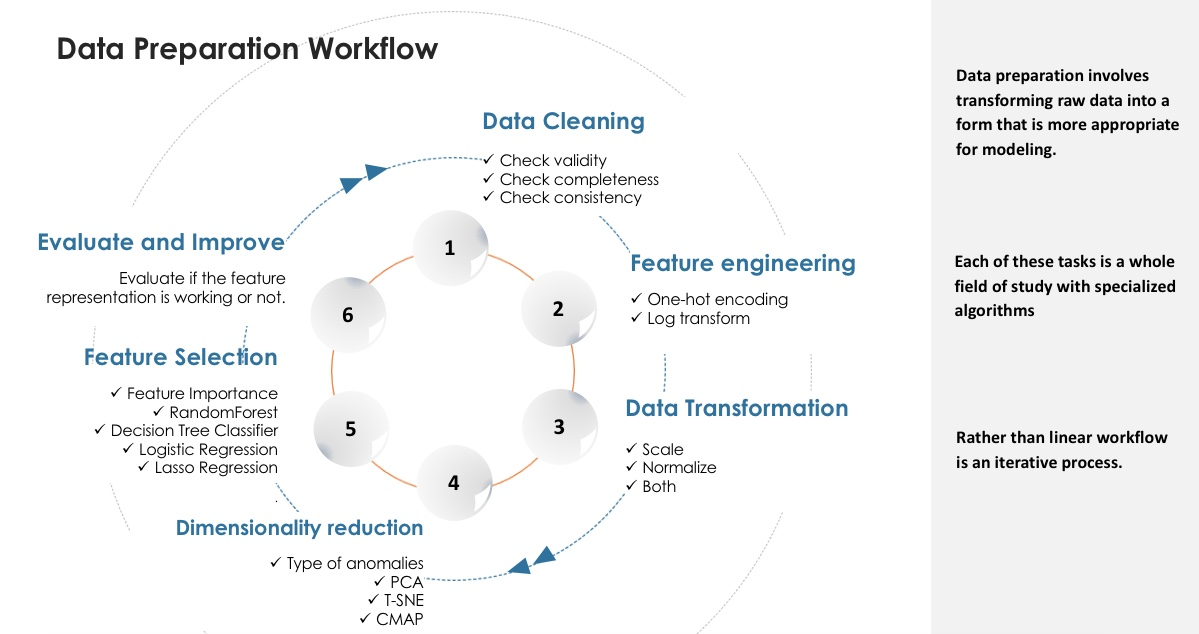

#Dataset Quality and Data cleaning


1.   **Validity**

**Problem**: Detecting fraud on Accounting Information Systems

**Domain knowledge**: I was working for more than 4 years in one of the largest payment services companies in Latinamerica. I worked on many projects to automatize and improve business processes such as online payment fraud, cybersecurity risks and fraud on internal information systems. In fact, I have a database with 2 years of accounting information, however, they didn´t authorize to present, share or publish results.

However, they agree to use two datasets which are available online and comes from German Research Center for Artiﬁcial Intelligence.Both datasets are really close to reality and both were extracted from SAP ERP 

**Database A**: Records on Accounting Information Systems


The database record the information flow from an incoming voice to an outgoing payment, technical journal entries are recorded in designated database tables.

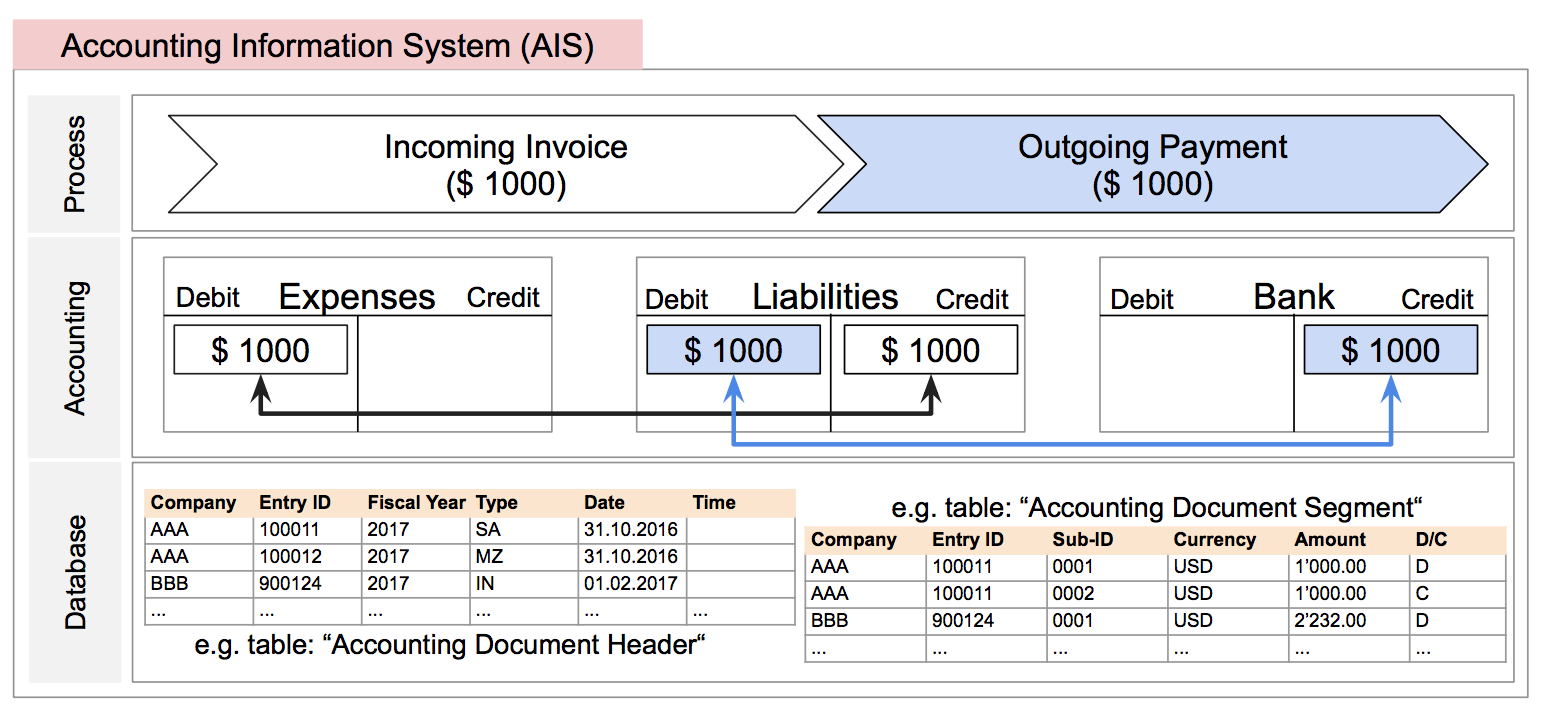

**Database B**: SAP User actions

Each line corresponds to a user actions which were extracted from BI system logs

It is important to perform the anomaly detection task on each dataset separately, because on the user action dataset the focus is prevention and the accounting systems is detection

In [ ]:
#load the synthetic ERP dataset
ori_dataset = pd.read_csv('/content/gdrive/My Drive/dataset journal entries/fraud_dataset_v2.csv')
ori_dataset

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
0,288203,C3,C31,C9,C92,A3,B1,280979.60,0.00,regular
1,324441,C1,C18,C7,C76,A1,B2,129856.53,243343.00,regular
2,133537,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,regular
3,331521,C4,C48,C9,C95,A2,B1,2681709.51,28778.00,regular
4,375333,C5,C58,C1,C19,A3,B1,910514.49,346.00,regular
...,...,...,...,...,...,...,...,...,...,...
533004,446818,C1,C18,C3,C32,A1,B2,2501589.15,0.00,regular
533005,455564,C8,C80,C1,C11,A1,B1,390076.18,12065.45,regular
533006,156896,C1,C10,C1,C19,A1,B1,192147.38,326823.09,regular
533007,455245,C1,C14,C4,C40,A1,B3,870539.68,0.00,regular


1.  BELNR: the accounting document number
2.   WAERS: the currency key
3.   BUKRS: the company code
4.   KTOSL: the general ledger account key
5.   PRCTR: the posted profit center
6.   BSCHL: the posting key
7.   HKONT: the posted general ledger account
8.   DMBTR: the amount in local currency
9.   WRBTR: the amount in document currency

**2.   Check completness**

In [ ]:
ori_dataset.isnull().values.any().sum()

0

In [ ]:
import pandas as pd
#load the synthetic ERP dataset
user_dataset = pd.read_csv('/content/gdrive/My Drive/dataset journal entries/sap-pilot-dataset-enhanced.csv', delimiter=';')
user_dataset

,extid,object,subobject,user,role,date,label,outbushours
0,ADMIN_WORKBENCH,MNT,TCD,OBLITUS,ADMIN,01/06/2018,BENIGN,OUTSIDE
1,PERSONAL,PDO,SDL,OBLIVIONI,LAMBDA,01/06/2018,BENIGN,OUTSIDE
2,ADMIN_WORKBENCH,MNT,TCD,OBLITUS,ADMIN,01/06/2018,BENIGN,OUTSIDE
3,PERSONAL,PDO,SDL,OBLIVIONI,LAMBDA,01/06/2018,BENIGN,OUTSIDE
4,ADMIN_WORKBENCH,MNT,TCD,OBLITUS,ADMIN,01/06/2018,BENIGN,OUTSIDE
...,...,...,...,...,...,...,...,...
174195,ADMIN_WORKBENCH,MNT,TCD,TRIP,ADMIN,26/01/2019,BENIGN,OUTSIDE
174196,PERSONAL,PDO,SDL,MARCUS,CLEARED,27/01/2019,BENIGN,OUTSIDE
174197,PERSONAL,PDO,SDL,GRU,CLEARED,27/01/2019,BENIGN,OUTSIDE
174198,FIB,ICUBE,IOBJ_SAVE,ALPHONSE,CREATOR,27/01/2019,BENIGN,INSIDE


In [ ]:
user_dataset['extid'].value_counts()

PERSONAL           55662
ADMIN_WORKBENCH    31443
FISHING             6578
SPAM                6525
JUNK                6381
                   ...  
EDGE                 332
YWING                331
MADOKA               328
THUNDER              327
MEMOIR               324
Name: extid, Length: 85, dtype: int64

In [ ]:
user_dataset['object'].value_counts()

ICUBE    87095
PDO      55662
MNT      31443
Name: object, dtype: int64

In [ ]:
user_dataset['subobject'].value_counts()

SDL          55662
IOBJ_ACC     43637
TCD          31443
IOBJ_SAVE    29043
IOBJ_DEL     14415
Name: subobject, dtype: int64

In [ ]:
user_dataset['user'].value_counts()

WINRY        29243
ALPHONSE     19498
EVE          19484
OBLIVIONI    19400
MALIGNUS     18440
MALLORY      17273
RIDLEY       10204
MARCUS       10180
LUCIFER       7314
GRU           7248
OBLITUS       5000
TRIP          4130
TWARDY        3873
MIMI          2913
Name: user, dtype: int64

In [ ]:
user_dataset['role'].value_counts()

CREATOR    58120
LAMBDA     48375
CLEARED    36262
ADMIN      31443
Name: role, dtype: int64

In [ ]:
user_dataset['outbushours'].value_counts()

OUTSIDE    101456
INSIDE      72744
Name: outbushours, dtype: int64

1. exit id: user-group
2. object: 
3. subobject
4. user: user name
5. role : role
6. data
7. label: anomaly or not
8. outbushours:out of business hours

In [ ]:
user_dataset.isnull().values.any().sum()

0

In [ ]:
# inspect the dataset dimensions
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] Transactional dataset of {} rows and {} columns loaded'.format(now, ori_dataset.shape[0], ori_dataset.shape[1]))

[LOG 20201025-15:05:39] Transactional dataset of 533009 rows and 10 columns loaded


In [ ]:
# inspect top rows of the ERP dataset
ori_dataset.head(10) 

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
0,288203,C3,C31,C9,C92,A3,B1,280979.60,0.00,regular
1,324441,C1,C18,C7,C76,A1,B2,129856.53,243343.00,regular
2,133537,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,regular
3,331521,C4,C48,C9,C95,A2,B1,2681709.51,28778.00,regular
4,375333,C5,C58,C1,C19,A3,B1,910514.49,346.00,regular
5,327203,C1,C15,C6,C68,A1,B2,357627.56,704520.00,regular
6,292545,C4,C47,C2,C28,A2,B3,955576.84,128328.00,regular
7,335839,C1,C19,C1,C17,A1,B1,41769.26,0.00,regular
8,369064,C4,C40,C9,C97,A2,B1,44309.79,0.00,regular
9,138724,C6,C69,C1,C12,A2,B1,466720.45,43843.00,regular


3.   **Consistency (Unbalanced dataset)**

In [ ]:
# number of anomalies vs. regular transactions
ori_dataset.label.value_counts()

regular    532909
global         70
local          30
Name: label, dtype: int64

Similar to real world scenarios, we are facing a highly "unbalanced" dataset. Overall, the dataset contains only a small fraction of 100 (0.018%) anomalous transactions. While the 100 anomalous entries encompass 70 (0.013%) "global" anomalies and 30 (0.005%) "local" anomalies

In [ ]:
# number of anomalies vs. regular transactions
user_dataset.label.value_counts()

In [ ]:
# remove the "ground-truth" label information for the following steps of the lab
label = ori_dataset.pop('label')

In [ ]:
label

0         regular
1         regular
2         regular
3         regular
4         regular
           ...   
533004    regular
533005    regular
533006    regular
533007    regular
533008    regular
Name: label, Length: 533009, dtype: object

#Feature Engineering

**1.   One Hot encoding**



In [ ]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,3)
fig.set_figwidth(40)

# plot the distribution of the posting key attribute
g = sns.countplot(x=ori_dataset.loc[label=='regular', 'BSCHL'], ax=ax[0])
g.set_xticklabels(g.get_xticklabels(), rotation=0)
g.set_title('Distribution of BSCHL attribute values')

# plot the distribution of the general ledger account attribute
g = sns.countplot(x=ori_dataset.loc[label=='regular', 'HKONT'], ax=ax[1])
g.set_xticklabels(g.get_xticklabels(), rotation=0)
g.set_title('Distribution of HKONT attribute values');

# plot the distribution of the general ledger account attribute
g = sns.countplot(x=ori_dataset.loc[label=='regular', 'WAERS'], ax=ax[2])
g.set_xticklabels(g.get_xticklabels(), rotation=0)
g.set_title('Distribution of WAERS attribute values');

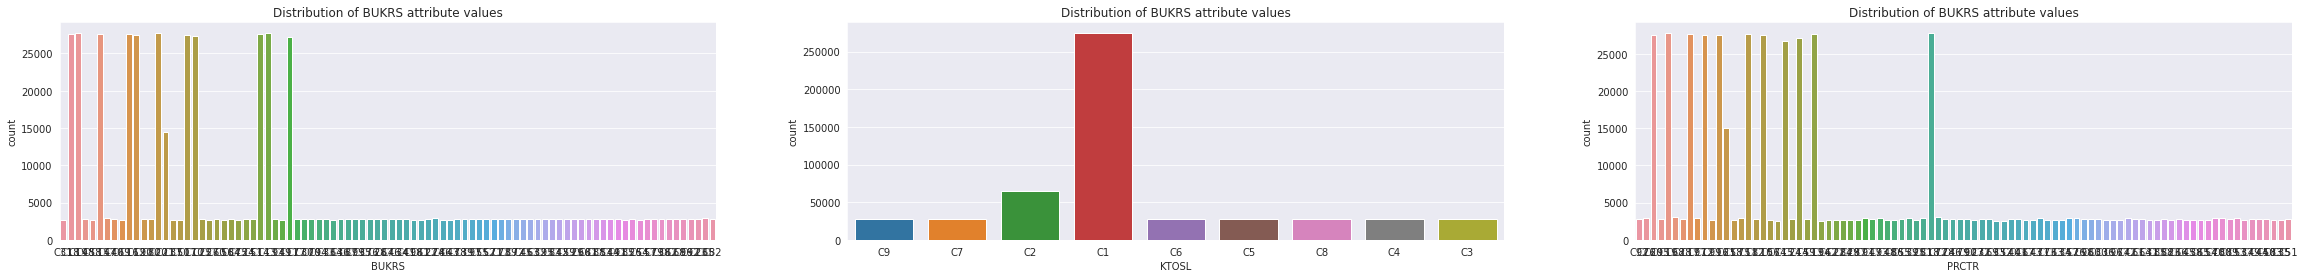

In [ ]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,3)
fig.set_figwidth(40)

# plot the distribution of the general ledger account attribute
g = sns.countplot(x=ori_dataset.loc[label=='regular', 'BUKRS'], ax=ax[0])
g.set_xticklabels(g.get_xticklabels(), rotation=0)
g.set_title('Distribution of BUKRS attribute values');

# plot the distribution of the general ledger account attribute
g = sns.countplot(x=ori_dataset.loc[label=='regular', 'KTOSL'], ax=ax[1])
g.set_xticklabels(g.get_xticklabels(), rotation=0)
g.set_title('Distribution of BUKRS attribute values');

# plot the distribution of the general ledger account attribute
g = sns.countplot(x=ori_dataset.loc[label=='regular', 'PRCTR'], ax=ax[2])
g.set_xticklabels(g.get_xticklabels(), rotation=0)
g.set_title('Distribution of BUKRS attribute values');

In [ ]:
labels_rob = ori_dataset['label']
type(labels_rob)

pandas.core.series.Series

In [ ]:
# select categorical attributes to be "one-hot" encoded
categorical_attr_names = ['KTOSL', 'PRCTR', 'BSCHL', 'HKONT', 'BUKRS', 'WAERS', 'label']

# encode categorical attributes into a binary one-hot encoded representation 
ori_dataset_categ_transformed = pd.get_dummies(ori_dataset[categorical_attr_names])

In [ ]:
ori_dataset_categ_transformed

,KTOSL_A19,KTOSL_B06,KTOSL_B12,KTOSL_B83,KTOSL_C1,KTOSL_C2,KTOSL_C3,KTOSL_C39,KTOSL_C4,KTOSL_C5,KTOSL_C6,KTOSL_C7,KTOSL_C76,KTOSL_C8,KTOSL_C84,KTOSL_C9,KTOSL_D30,KTOSL_D51,KTOSL_D84,KTOSL_D89,KTOSL_E35,KTOSL_E40,KTOSL_F19,KTOSL_F45,KTOSL_G09,KTOSL_G19,KTOSL_G28,KTOSL_I08,KTOSL_I94,KTOSL_J33,KTOSL_J53,KTOSL_J67,KTOSL_J81,KTOSL_K00,KTOSL_K78,KTOSL_K80,KTOSL_K84,KTOSL_L07,KTOSL_L09,KTOSL_L17,...,WAERS_L47,WAERS_L82,WAERS_M07,WAERS_N09,WAERS_N15,WAERS_N43,WAERS_O37,WAERS_O43,WAERS_O64,WAERS_O67,WAERS_P03,WAERS_P31,WAERS_P36,WAERS_P37,WAERS_P79,WAERS_Q52,WAERS_Q82,WAERS_R07,WAERS_R09,WAERS_S05,WAERS_S12,WAERS_S31,WAERS_T17,WAERS_T28,WAERS_T65,WAERS_T68,WAERS_T87,WAERS_U72,WAERS_U94,WAERS_V89,WAERS_W25,WAERS_W59,WAERS_X26,WAERS_Y59,WAERS_Z06,WAERS_Z37,WAERS_Z54,label_global,label_local,label_regular
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533004,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
533005,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
533006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
533007,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**2.   Log Transformation quantitative variables**

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


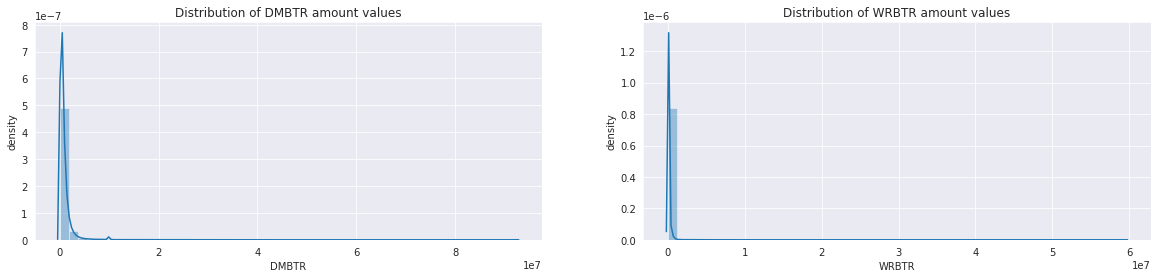

In [ ]:
# init the plots
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)

# plot distribution of the local amount attribute
g = sns.distplot(ori_dataset['DMBTR'].tolist(), ax=ax[0])
g.set_title('Distribution of DMBTR amount values')

# set axis-labels 
ax[0].set_xlabel('DMBTR')
ax[0].set_ylabel('density')

# plot distribution of the document amount attribute
g = sns.distplot(ori_dataset['WRBTR'].tolist(), ax=ax[1])
g.set_title('Distribution of WRBTR amount values')

# set axis-labels
ax[1].set_xlabel('WRBTR')
ax[1].set_ylabel('density');

In [ ]:
# select "DMBTR" vs. "WRBTR" attribute
numeric_attr_names = ['DMBTR', 'WRBTR']

# add a small epsilon to eliminate zero values from data for log scaling
numeric_attr = ori_dataset[numeric_attr_names] + 1e-4
numeric_attr = numeric_attr.apply(np.log)

# normalize all numeric attributes to the range [0,1]
ori_dataset_numeric_attr = (numeric_attr - numeric_attr.min()) / (numeric_attr.max() - numeric_attr.min())

#Data Transformation

**1.   Scaling**




In [ ]:
from sklearn.preprocessing import StandardScaler
ori_dataset_numeric_attr_std_scaler = StandardScaler().fit_transform(ori_dataset[numeric_attr_names])
ori_dataset_numeric_attr_std_scaler

array([[-0.29814245, -0.07670041],
       [-0.3683575 ,  0.22308289],
       [ 0.01616683,  3.84558867],
       ...,
       [-0.33941582,  0.32592512],
       [-0.02422007, -0.07670041],
       [-0.18146328, -0.036703  ]])

In [ ]:
ori_dataset_numeric_attr_std_scaler_df = pd.DataFrame(data = ori_dataset_numeric_attr_std_scaler)

In [ ]:
ori_dataset_numeric_attr_std_scaler_df 

,0,1
0,-0.298142,-0.076700
1,-0.368357,0.223083
2,0.016167,3.845589
3,0.817289,-0.041248
4,-0.005647,-0.076274
...,...,...
533004,0.733601,-0.076700
533005,-0.247454,-0.061837
533006,-0.339416,0.325925
533007,-0.024220,-0.076700


In [ ]:
ori_dataset_numeric_attr_std_scaler_df.columns = ['DMBTR','WRBTR']
ori_dataset_numeric_attr_std_scaler_df

,DMBTR,WRBTR
0,-0.298142,-0.076700
1,-0.368357,0.223083
2,0.016167,3.845589
3,0.817289,-0.041248
4,-0.005647,-0.076274
...,...,...
533004,0.733601,-0.076700
533005,-0.247454,-0.061837
533006,-0.339416,0.325925
533007,-0.024220,-0.076700


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


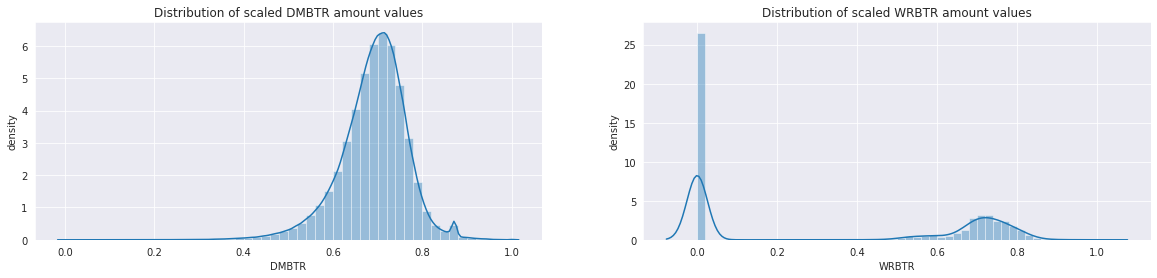

In [ ]:
# init the plots
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)

# plot distribution of the local amount attribute
g = sns.distplot(ori_dataset_numeric_attr['DMBTR'].tolist(), ax=ax[0])
g.set_title('Distribution of scaled DMBTR amount values')

# set axis-labels 
ax[0].set_xlabel('DMBTR')
ax[0].set_ylabel('density')

# plot distribution of the local amount attribute
g = sns.distplot(ori_dataset_numeric_attr['WRBTR'].tolist(), ax=ax[1])
g.set_title('Distribution of scaled WRBTR amount values')

# set axis-labels
ax[1].set_xlabel('WRBTR')
ax[1].set_ylabel('density');

# Dimensionality reduction

**1.   Global and Local Anomalies**

**Global Anomalies**, are financial transactions that exhibit unusual or rare individual attribute values. These anomalies usually relate to highly skewed attributes e.g. seldom posting users, rarely used ledgers, or unusual posting times.

Traditionally "red-flag" tests, performed by auditors during annual audits, are designed to capture those types of anomalies. However, such tests might result in a high volume of false positive alerts due to e.g. regular reverse postings, provisions and year-end adjustments usually associated with a low fraud risk.

**Local Anomalies**, are financial transactions that exhibit an unusual or rare combination of attribute values while the individual attribute values occur quite frequently e.g. unusual accounting records.

This type of anomaly is significantly more difficult to detect since perpetrators intend to disguise their activities trying to imitate a regular behaviour. As a result, such anomalies usually pose a high fraud risk since they might correspond to e.g. misused user accounts, irregular combinations of general ledger accounts and posting keys that don't follow an usual activity pattern.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# append 'label' attribute 
numeric_attr_vis = ori_dataset_numeric_attr.copy()
numeric_attr_vis['label'] = label

# plot the log-scaled and min-max normalized numeric attributes
g = sns.pairplot(data=numeric_attr_vis, vars=numeric_attr_names, hue='label', palette={'regular': 'C0', 'local': 'C3', 'global': 'C1'}, markers=['o', 'x', 'x'])

# set figure title
g.fig.suptitle('Distribution of DMBTR vs. WRBTR amount values', y=1.02)

# set figure size
g.fig.set_size_inches(10, 5)

In [ ]:
# merge categorical and numeric subsets
ori_subset_transformed = pd.concat([ori_dataset_categ_transformed, ori_dataset_numeric_attr], axis = 1)

In [ ]:
ori_subset_transformed

,KTOSL_A19,KTOSL_B06,KTOSL_B12,KTOSL_B83,KTOSL_C1,KTOSL_C2,KTOSL_C3,KTOSL_C39,KTOSL_C4,KTOSL_C5,KTOSL_C6,KTOSL_C7,KTOSL_C76,KTOSL_C8,KTOSL_C84,KTOSL_C9,KTOSL_D30,KTOSL_D51,KTOSL_D84,KTOSL_D89,KTOSL_E35,KTOSL_E40,KTOSL_F19,KTOSL_F45,KTOSL_G09,KTOSL_G19,KTOSL_G28,KTOSL_I08,KTOSL_I94,KTOSL_J33,KTOSL_J53,KTOSL_J67,KTOSL_J81,KTOSL_K00,KTOSL_K78,KTOSL_K80,KTOSL_K84,KTOSL_L07,KTOSL_L09,KTOSL_L17,...,WAERS_M07,WAERS_N09,WAERS_N15,WAERS_N43,WAERS_O37,WAERS_O43,WAERS_O64,WAERS_O67,WAERS_P03,WAERS_P31,WAERS_P36,WAERS_P37,WAERS_P79,WAERS_Q52,WAERS_Q82,WAERS_R07,WAERS_R09,WAERS_S05,WAERS_S12,WAERS_S31,WAERS_T17,WAERS_T28,WAERS_T65,WAERS_T68,WAERS_T87,WAERS_U72,WAERS_U94,WAERS_V89,WAERS_W25,WAERS_W59,WAERS_X26,WAERS_Y59,WAERS_Z06,WAERS_Z37,WAERS_Z54,label_global,label_local,label_regular,DMBTR,WRBTR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.666634,0.000000
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.622241,0.797122
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.737149,0.891960
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.796385,0.718383
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.734257,0.555329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533004,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.792386,0.000000
533005,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.685503,0.686323
533006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.644777,0.808000
533007,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.731675,0.000000


In [ ]:
ori_subset_transformed_scaler = pd.concat([ori_dataset_categ_transformed, ori_dataset_numeric_attr_std_scaler_df], axis = 1)
ori_subset_transformed_scaler 

,KTOSL_A19,KTOSL_B06,KTOSL_B12,KTOSL_B83,KTOSL_C1,KTOSL_C2,KTOSL_C3,KTOSL_C39,KTOSL_C4,KTOSL_C5,KTOSL_C6,KTOSL_C7,KTOSL_C76,KTOSL_C8,KTOSL_C84,KTOSL_C9,KTOSL_D30,KTOSL_D51,KTOSL_D84,KTOSL_D89,KTOSL_E35,KTOSL_E40,KTOSL_F19,KTOSL_F45,KTOSL_G09,KTOSL_G19,KTOSL_G28,KTOSL_I08,KTOSL_I94,KTOSL_J33,KTOSL_J53,KTOSL_J67,KTOSL_J81,KTOSL_K00,KTOSL_K78,KTOSL_K80,KTOSL_K84,KTOSL_L07,KTOSL_L09,KTOSL_L17,...,WAERS_M07,WAERS_N09,WAERS_N15,WAERS_N43,WAERS_O37,WAERS_O43,WAERS_O64,WAERS_O67,WAERS_P03,WAERS_P31,WAERS_P36,WAERS_P37,WAERS_P79,WAERS_Q52,WAERS_Q82,WAERS_R07,WAERS_R09,WAERS_S05,WAERS_S12,WAERS_S31,WAERS_T17,WAERS_T28,WAERS_T65,WAERS_T68,WAERS_T87,WAERS_U72,WAERS_U94,WAERS_V89,WAERS_W25,WAERS_W59,WAERS_X26,WAERS_Y59,WAERS_Z06,WAERS_Z37,WAERS_Z54,label_global,label_local,label_regular,DMBTR,WRBTR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.298142,-0.076700
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.368357,0.223083
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.016167,3.845589
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.817289,-0.041248
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.005647,-0.076274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533004,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.733601,-0.076700
533005,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.247454,-0.061837
533006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.339416,0.325925
533007,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.024220,-0.076700


In [ ]:
ori_subset_transformed_scaler 

,KTOSL_A19,KTOSL_B06,KTOSL_B12,KTOSL_B83,KTOSL_C1,KTOSL_C2,KTOSL_C3,KTOSL_C39,KTOSL_C4,KTOSL_C5,KTOSL_C6,KTOSL_C7,KTOSL_C76,KTOSL_C8,KTOSL_C84,KTOSL_C9,KTOSL_D30,KTOSL_D51,KTOSL_D84,KTOSL_D89,KTOSL_E35,KTOSL_E40,KTOSL_F19,KTOSL_F45,KTOSL_G09,KTOSL_G19,KTOSL_G28,KTOSL_I08,KTOSL_I94,KTOSL_J33,KTOSL_J53,KTOSL_J67,KTOSL_J81,KTOSL_K00,KTOSL_K78,KTOSL_K80,KTOSL_K84,KTOSL_L07,KTOSL_L09,KTOSL_L17,...,WAERS_M07,WAERS_N09,WAERS_N15,WAERS_N43,WAERS_O37,WAERS_O43,WAERS_O64,WAERS_O67,WAERS_P03,WAERS_P31,WAERS_P36,WAERS_P37,WAERS_P79,WAERS_Q52,WAERS_Q82,WAERS_R07,WAERS_R09,WAERS_S05,WAERS_S12,WAERS_S31,WAERS_T17,WAERS_T28,WAERS_T65,WAERS_T68,WAERS_T87,WAERS_U72,WAERS_U94,WAERS_V89,WAERS_W25,WAERS_W59,WAERS_X26,WAERS_Y59,WAERS_Z06,WAERS_Z37,WAERS_Z54,label_global,label_local,label_regular,DMBTR,WRBTR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.298142,-0.076700
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.368357,0.223083
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.016167,3.845589
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.817289,-0.041248
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.005647,-0.076274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533004,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.733601,-0.076700
533005,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.247454,-0.061837
533006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.339416,0.325925
533007,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.024220,-0.076700


In [ ]:
labels_196_vo = np.where(labels_rob=='regular', '0', '1')
labels_196_vo

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [ ]:
labels_196 = pd.DataFrame(labels_196_vo)

In [ ]:
labels_196.columns = ['target']
labels_196

,target
0,0
1,0
2,0
3,0
4,0
...,...
533004,0
533005,0
533006,0
533007,0


In [ ]:
ori_subset_transformed_scaler.to_csv(r"gdrive/My Drive/DevNet-semi accounting/dataset/ori_subset_transformed_621.csv", index = False, header = True)

In [ ]:
ori_subset_transformed_scaler.shape

(533009, 621)

In [ ]:
labels_621 = labels_196

In [ ]:
labels_621.shape

(533009, 1)

In [ ]:
labels_621.to_csv(r"gdrive/My Drive/DevNet-semi accounting/dataset/labels_621.csv", index = False, header = True)

In [ ]:
ori_subset_transformed_scaler.shape

(533009, 618)

In [ ]:
# inspect final dimensions of pre-processed transactional data
ori_subset_transformed.shape

(533009, 618)

In [ ]:
type(ori_subset_transformed)

pandas.core.frame.DataFrame

In [ ]:
type(label)

pandas.core.series.Series

In [ ]:
label

0         regular
1         regular
2         regular
3         regular
4         regular
           ...   
533004    regular
533005    regular
533006    regular
533007    regular
533008    regular
Name: label, Length: 533009, dtype: object

In [ ]:
ori_subset_transformed.to_csv(r"/content/gdrive/My Drive/ori_subset_transformed.csv", index = False, header = True)

In [ ]:
import csv
ori_subset_transformed.to_csv("/content/gdrive/My Drive/ori_subset_transformed.tsv", sep="\t", header=False, index=False, quoting=csv.QUOTE_NONE, quotechar="",  escapechar="\\")

In [ ]:
label.to_csv(r"/content/gdrive/My Drive/label.csv", index = False, header = True)

In [ ]:
label.to_csv("/content/gdrive/My Drive/label.tsv", sep="\t", header=False, index=False, quoting=csv.QUOTE_NONE, quotechar="",  escapechar="\\")

**1.   PCA**

In [ ]:
labels_v = np.where(label=='regular', '0', '1')
labels_v

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [ ]:
labels_v.shape

(533009,)

In [ ]:
labels_pca = pd.DataFrame(labels_v)

In [ ]:
labels_pca 

,0
0,0
1,0
2,0
3,0
4,0
...,...
533004,0
533005,0
533006,0
533007,0


In [ ]:
labels_pca.columns = ['target']

In [ ]:
type(label)

pandas.core.series.Series

In [ ]:
labels_pca.to_csv(r"/content/gdrive/My Drive/labelbin.csv", index = False, header = True)

**Two principal compoents** explain no more than 30% of the variance, however we can visualize between the three types of data objects such as regular (normal samples) and global and local anomalies



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ori_subset_transformed_scaler)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, label], axis = 1)

In [ ]:
finalDf

,principal component 1,principal component 2,label
0,-0.255811,-0.087257,regular
1,-0.099607,0.794018,regular
2,2.735648,1.242003,regular
3,0.556810,-0.101116,regular
4,-0.056353,-0.716289,regular
...,...,...,...
533004,0.467073,0.781180,regular
533005,-0.224385,-0.702189,regular
533006,-0.020931,-0.693803,regular
533007,-0.066774,1.013068,regular


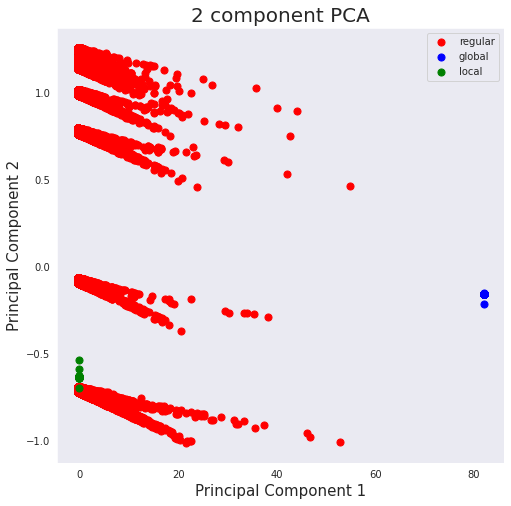

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['regular', 'global', 'local']
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
from sklearn.decomposition import PCA
pca_69 = PCA(n_components=69)
principalComponents_69 = pca_69.fit_transform(ori_subset_transformed_scaler)

In [ ]:
pca.explained_variance_ratio_

array([0.22867294, 0.0993187 ])

In [ ]:
pca_69.explained_variance_ratio_

In [ ]:
pca.explained_variance_

array([1.45291049, 0.63103744])

In [ ]:
pca_69.explained_variance_

array([1.45291049, 0.63103744, 0.54842231, 0.53910745, 0.26199098,
       0.21229628, 0.21082868, 0.11401085, 0.09492436, 0.07364467,
       0.0578629 , 0.05732935, 0.0571967 , 0.05693475, 0.05688086,
       0.056753  , 0.05667708, 0.05622037, 0.05230028, 0.05218568,
       0.05210749, 0.05206801, 0.05204866, 0.05196792, 0.05190685,
       0.05182862, 0.05171898, 0.05168414, 0.05160691, 0.05157084,
       0.05147719, 0.05140776, 0.05126147, 0.05112008, 0.05085528,
       0.0501771 , 0.03713643, 0.03662521, 0.0148334 , 0.01480837,
       0.00548071, 0.00535997, 0.00532397, 0.00532168, 0.00531392,
       0.00529999, 0.00529249, 0.00529027, 0.00527119, 0.0052674 ,
       0.0052563 , 0.00525074, 0.00524611, 0.00524137, 0.0052315 ,
       0.00522205, 0.00521178, 0.00521068, 0.00520182, 0.0051945 ,
       0.00519299, 0.00518399, 0.00518137, 0.0051728 , 0.00517166,
       0.00516678, 0.00516044, 0.00514847, 0.00514478])

In [ ]:
pca.components_

array([[ 1.05796003e-04,  1.05796013e-04,  1.05796014e-04, ...,
         1.05795898e-04,  7.06996975e-01,  7.07071207e-01],
       [-4.65818410e-07, -4.65818505e-07, -4.65818574e-07, ...,
        -4.67699298e-07, -9.55463947e-03, -3.53484600e-03]])

**Cumulative explained variance vs the number of components**

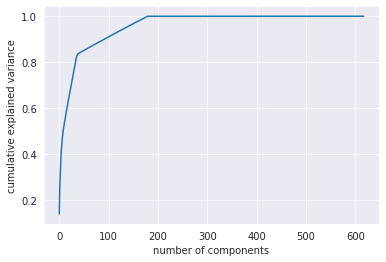

In [ ]:
pca_v2 = PCA().fit(ori_subset_transformed)
plt.plot(np.cumsum(pca_v2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

#boston = load_boston()
df = ori_subset_transformed_scaler
n_components = 5

pca = PCA(n_components=n_components)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color = labels_v,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = ori_subset_transformed_scaler
X = df

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=labels_v,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
labels_pca['target']

0         0
1         0
2         0
3         0
4         0
         ..
533004    0
533005    0
533006    0
533007    0
533008    0
Name: target, Length: 533009, dtype: object

In [ ]:
pip install yellowbrick

In [ ]:
pip install -U yellowbrick

  Using cached yellowbrick-1.1-py3-none-any.whl (263 kB)
     |████████████████████████████████| 11.6 MB 233 kB/s 
     |████████████████████████████████| 88 kB 9.5 MB/s 


**Three principals components** explain no more than 40% of te variance, however we can visualize between the three types of data objects such as regular (normal samples) and global and local anomalies


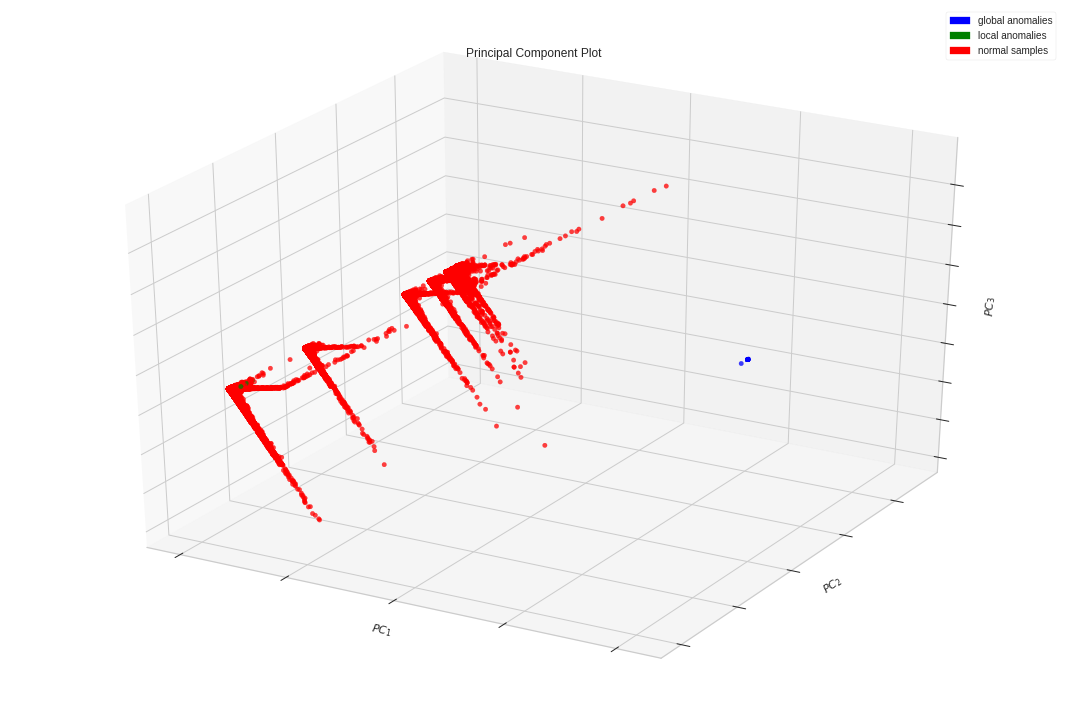

In [ ]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA
from sklearn.preprocessing import LabelEncoder
from yellowbrick.style import set_palette
from yellowbrick.features import RadViz

label_encoder = LabelEncoder().fit(label)
y = label_encoder.transform(label)
X=ori_subset_transformed_scaler
#y=labels_pca['target']
classes = ['global anomalies', 'local anomalies', 'normal samples']
visualizer = RadViz(size=(1080, 720))
visualizer = PCA(
    scale=False, projection=3, classes=classes, color=set_palette('reset')
)
visualizer.fit_transform(X, y)
visualizer.show()

In [ ]:
label

0         regular
1         regular
2         regular
3         regular
4         regular
           ...   
533004    regular
533005    regular
533006    regular
533007    regular
533008    regular
Name: label, Length: 533009, dtype: object

**T-SNE **

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


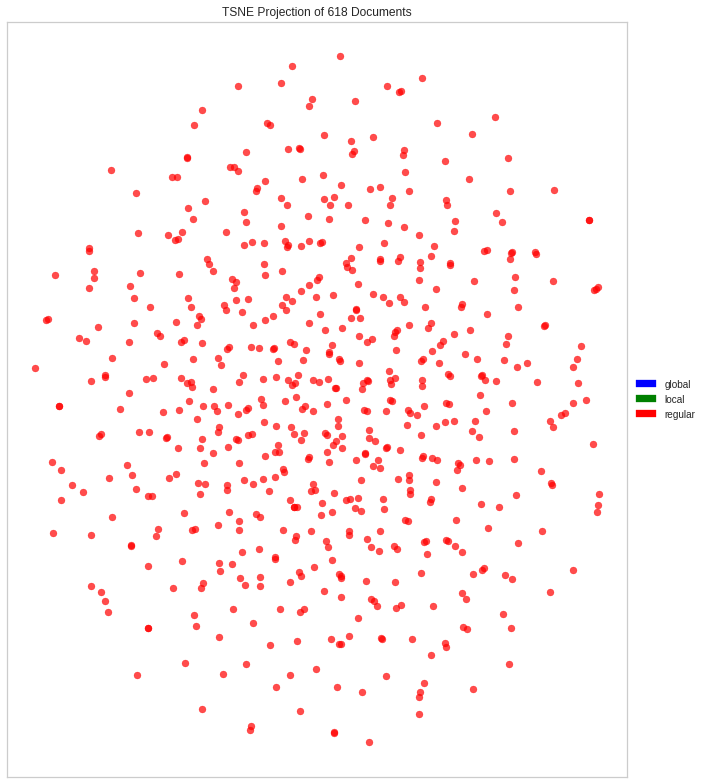

In [ ]:
# Import needed packages
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer
from sklearn.preprocessing import LabelEncoder
# Prepare the data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(ori_subset_transformed_scaler)
#label_encoder = LabelEncoder().fit(label)
#y = label_encoder.transform(label)
# Plot t-SNE
y=label
tsne = TSNEVisualizer(size=(1000,1000))
tsne.fit_transform(X, y)
tsne.poof();

#Feature Selection

**1.   Feature importance by a Decision Tree Classifier**

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00966
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

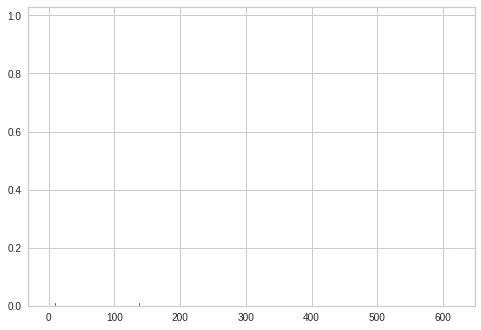

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X= ori_subset_transformed_scaler
y= labels_pca 
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

**2.   Feature importance by a Random Forest Classifier**


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Feature: 0, Score: 0.00042
Feature: 1, Score: 0.00009
Feature: 2, Score: 0.00011
Feature: 3, Score: 0.00102
Feature: 4, Score: 0.01923
Feature: 5, Score: 0.00145
Feature: 6, Score: 0.00149
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00027
Feature: 9, Score: 0.00293
Feature: 10, Score: 0.00281
Feature: 11, Score: 0.00371
Feature: 12, Score: 0.00040
Feature: 13, Score: 0.00293
Feature: 14, Score: 0.00075
Feature: 15, Score: 0.00480
Feature: 16, Score: 0.00086
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00091
Feature: 19, Score: 0.00069
Feature: 20, Score: 0.00011
Feature: 21, Score: 0.00101
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00030
Feature: 24, Score: 0.00132
Feature: 25, Score: 0.00069
Feature: 26, Score: 0.00157
Feature: 27, Score: 0.00045
Feature: 28, Score: 0.00096
Feature: 29, Score: 0.00065
Feature: 30, Score: 0.00029
Feature: 31, Score: 0.00071
Feature: 32, Score: 0.00021
Feature: 33, Score: 0.00011
Feature: 34, Score: 0.00068
Feature: 35, Score: 0.00053
Fe

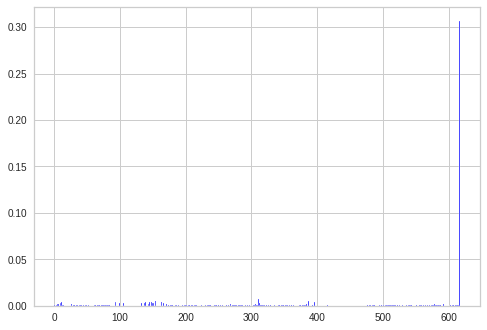

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X= ori_subset_transformed_scaler
y= labels_pca 
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
!pip install --upgrade xgboost

Requirement already up-to-date: xgboost in /usr/local/lib/python3.6/site-packages (1.2.0)


**3.   Feature importance by a XGBClassifier**

In [ ]:
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X= ori_subset_transformed_scaler
y= labels_pca 
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

**4.   Feature importance by LogisticRegression**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X= ori_subset_transformed_scaler
y= labels_pca 
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X= ori_subset_transformed_scaler
y= labels_pca 
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature: 0, Score: 0.00633
Feature: 1, Score: 0.00633
Feature: 2, Score: 0.00633
Feature: 3, Score: 0.00629
Feature: 4, Score: 3.05119
Feature: 5, Score: -0.50527
Feature: 6, Score: -0.23783
Feature: 7, Score: 0.00633
Feature: 8, Score: -0.16013
Feature: 9, Score: -0.80360
Feature: 10, Score: -0.27443
Feature: 11, Score: -0.31506
Feature: 12, Score: 0.00633
Feature: 13, Score: -0.22327
Feature: 14, Score: 0.00633
Feature: 15, Score: -1.03943
Feature: 16, Score: 0.00633
Feature: 17, Score: 0.00633
Feature: 18, Score: 0.00633
Feature: 19, Score: 0.00633
Feature: 20, Score: 0.00633
Feature: 21, Score: 0.00633
Feature: 22, Score: 0.00633
Feature: 23, Score: 0.00633
Feature: 24, Score: 0.00633
Feature: 25, Score: 0.00633
Feature: 26, Score: 0.00640
Feature: 27, Score: 0.00633
Feature: 28, Score: 0.00633
Feature: 29, Score: 0.00633
Feature: 30, Score: 0.00633
Feature: 31, Score: 0.00633
Feature: 32, Score: 0.00633
Feature: 33, Score: 0.05880
Feature: 34, Score: 0.00633
Feature: 35, Score: 0.

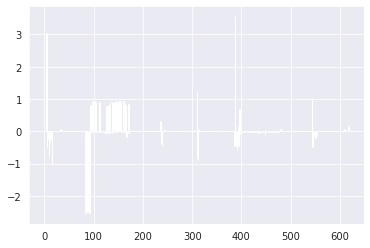

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X= ori_subset_transformed_scaler
y= labels_pca 
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LassoCV
from matplotlib import pyplot
# define dataset
X= ori_subset_transformed_scaler
y= labels_pca 
# define the model
model = LassoCV()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

**5.   Feature importance by Lasso Regression**

In [ ]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define the dataset
X= ori_subset_transformed_scaler
y= labels_pca 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 99.99


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# create ranking among all features by selecting only one
X= ori_subset_transformed_scaler
y= labels_pca 
rfe = RFE(LinearRegression(), n_features_to_select=20)
rfe.fit(X, y)
rfe.ranking_

In [ ]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest
discrete_feat_idx = [1:616] # an array with indices of discrete features
score_func = partial(mutual_info_classif, discrete_features=discrete_feat_idx)
s = SelectKBest(score_func)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

X= ori_subset_transformed_scaler
y= labels_pca 

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 20:
    sfm.threshold += 0.5
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1] 
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

# Neural network implementation (MLP)

# Semi-supervised

In [ ]:
import os
import numpy as np

np.random.seed(42)
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

#tf.set_random_seed(42)
tf.random.set_seed(42)
#sess = tf.Session()
sess = tf.compat.v1.initialize_all_variables()

from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint

import argparse
import numpy as np
import sys
from scipy.sparse import vstack, csc_matrix
#from utils import dataLoading, aucPerformance, writeResults, get_data_from_svmlight_file
from sklearn.model_selection import train_test_split
#from skmultilearn.model_selection import iterative_train_test_split
from numpy import savetxt, save
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score
import warnings


import time

MAX_INT = np.iinfo(np.int32).max
data_format = 0

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [ ]:
def dev_network_d(input_shape):
    '''
    deeper network architecture with three hidden layers (devnet-3hl)
    '''
    x_input = Input(shape=input_shape)
    intermediate = Dense(1000, activation='relu',
                         kernel_regularizer=regularizers.l2(0.01), name='hl1')(x_input)
    intermediate = Dense(250, activation='relu',
                         kernel_regularizer=regularizers.l2(0.01), name='hl2')(intermediate)
    intermediate = Dense(20, activation='relu',
                         kernel_regularizer=regularizers.l2(0.01), name='hl3')(intermediate)
    intermediate = Dense(1, activation='linear', name='score')(intermediate)
    return Model(x_input, intermediate)

In [ ]:
def dev_network_s(input_shape):
    '''
    network architecture with one hidden layer (def)
    '''
    x_input = Input(shape=input_shape)
    intermediate = Dense(20, activation='relu',
                         kernel_regularizer=regularizers.l2(0.01), name='hl1')(x_input)
    intermediate = Dense(1, activation='linear', name='score')(intermediate)
    return Model(x_input, intermediate)

In [ ]:
def dev_network_linear(input_shape):
    '''
    network architecture with no hidden layer, equivalent to linear mapping from
    raw inputs to anomaly scores (def-linear)
    '''
    x_input = Input(shape=input_shape)
    intermediate = Dense(1, activation='linear', name='score')(x_input)
    return Model(x_input, intermediate)

In [ ]:
def deviation_loss(y_true, y_pred):
    '''
    z-score-based deviation loss
    '''
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    confidence_margin = 5.
    ## size=5000 is the setting of l in algorithm 1 in the paper
    ref = K.variable(np.random.normal(loc=0., scale=1.0, size=5000), dtype='float32')
    dev = (y_pred - K.mean(ref)) / K.std(ref)
    inlier_loss = K.abs(dev)
    outlier_loss = K.abs(K.maximum(confidence_margin - dev, 0.))
    return K.mean((1 - y_true) * inlier_loss + y_true * outlier_loss)

In [ ]:
def deviation_network(input_shape, network_depth):
    '''
    construct the deviation network-based detection model
    '''
    if network_depth == 4:
        model = dev_network_d(input_shape)
    elif network_depth == 2:
        model = dev_network_s(input_shape)
    elif network_depth == 1:
        model = dev_network_linear(input_shape)
    else:
        sys.exit("The network depth is not set properly")
    rms = RMSprop(clipnorm=1.)
    model.compile(loss=deviation_loss, optimizer=rms)
    #model.compile(loss='binary_crossentropy', optimizer=rms)
    return model

In [ ]:
def batch_generator_sup(x, outlier_indices, inlier_indices, batch_size, nb_batch, rng):
    """batch generator
    """
    rng = np.random.RandomState(rng.randint(MAX_INT, size=1))
    #print('rng',rng)
    counter = 0
    while 1:
        if data_format == 0:
            ref, training_labels = input_batch_generation_sup(x, outlier_indices, inlier_indices, batch_size, rng)
        else:
            ref, training_labels = input_batch_generation_sup_sparse(x, outlier_indices, inlier_indices, batch_size,rng)
        counter += 1
        yield (ref, training_labels)
        if (counter > nb_batch):
            counter = 0

In [ ]:
def input_batch_generation_sup(x_train, outlier_indices, inlier_indices, batch_size, rng):
    '''
    batchs of samples. This is for csv data.
    Alternates between positive and negative pairs.
    '''
    dim = x_train.shape[1]
    ref = np.empty((batch_size, dim))
    training_labels = []
    n_inliers = len(inlier_indices)
    n_outliers = len(outlier_indices)
    for i in range(batch_size):
        if (i % 2 == 0):
            sid = rng.choice(n_inliers, 1)
            ref[i] = x_train[inlier_indices[sid]]
            training_labels += [0]
        else:
            sid = rng.choice(n_outliers, 1)
            ref[i] = x_train[outlier_indices[sid]]
            training_labels += [1]
   
    return np.array(ref), np.array(training_labels)

In [ ]:
def input_batch_generation_sup_sparse(x_train, outlier_indices, inlier_indices, batch_size, rng):
    '''
    batchs of samples. This is for libsvm stored sparse data.
    Alternates between positive and negative pairs.
    '''
    ref = np.empty((batch_size))
    training_labels = []
    n_inliers = len(inlier_indices)
    n_outliers = len(outlier_indices)
    for i in range(batch_size):
        if (i % 2 == 0):
            sid = rng.choice(n_inliers, 1)
            ref[i] = inlier_indices[sid]
            training_labels += [0]
        else:
            sid = rng.choice(n_outliers, 1)
            ref[i] = outlier_indices[sid]
            training_labels += [1]
    ref = x_train[ref, :].toarray()
    return ref, np.array(training_labels)

In [ ]:
def load_model_weight_predict(model_name, input_shape, network_depth, x_test):
    '''
    load the saved weights to make predictions
    '''
    model = deviation_network(input_shape, network_depth)
    model.load_weights(model_name)
    scoring_network = Model(inputs=model.input, outputs=model.output)

    if data_format == 0:
        scores = scoring_network.predict(x_test)
    else:
        data_size = x_test.shape[0]
        scores = np.zeros([data_size, 1])
        count = 512
        i = 0
        while i < data_size:
            subset = x_test[i:count].toarray()
            scores[i:count] = scoring_network.predict(subset)
            if i % 1024 == 0:
                print(i)
            i = count
            count += 512
            if count > data_size:
                count = data_size
        assert count == data_size
    return scores

In [ ]:
def inject_noise_sparse(seed, n_out, random_seed):
    '''
    add anomalies to training data to replicate anomaly contaminated data sets.
    we randomly swape 5% features of anomalies to avoid duplicate contaminated anomalies.
    This is for sparse data.
    '''
    rng = np.random.RandomState(random_seed)
    n_sample, dim = seed.shape
    swap_ratio = 0.05
    n_swap_feat = int(swap_ratio * dim)
    seed = seed.tocsc()
    noise = csc_matrix((n_out, dim))
    #print(noise.shape)
    for i in np.arange(n_out):
        outlier_idx = rng.choice(n_sample, 2, replace=False)
        o1 = seed[outlier_idx[0]]
        o2 = seed[outlier_idx[1]]
        swap_feats = rng.choice(dim, n_swap_feat, replace=False)
        noise[i] = o1.copy()
        noise[i, swap_feats] = o2[0, swap_feats]
    return noise.tocsr()

In [ ]:
def inject_noise(seed, n_out, random_seed):
    '''
    add anomalies to training data to replicate anomaly contaminated data sets.
    we randomly swape 5% features of anomalies to avoid duplicate contaminated anomalies.
    this is for dense data
    '''
    rng = np.random.RandomState(random_seed)
    n_sample, dim = seed.shape
    swap_ratio = 0.05
    n_swap_feat = int(swap_ratio * dim)
    noise = np.empty((n_out, dim))
    for i in np.arange(n_out):
        outlier_idx = rng.choice(n_sample, 2, replace=False)
        o1 = seed[outlier_idx[0]]
        o2 = seed[outlier_idx[1]]
        swap_feats = rng.choice(dim, n_swap_feat, replace=False)
        noise[i] = o1.copy()
        noise[i, swap_feats] = o2[swap_feats]
    return noise

In [ ]:
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.externals.joblib import Memory
from sklearn.metrics import average_precision_score, roc_auc_score

#mem = Memory("/Users/roberto/DevNet-semi accounting/dataset/svm_data")


#mem.cache
def get_data_from_svmlight_file(path):
    data = load_svmlight_file(path)
    return data[0], data[1]


def dataLoading(path):
    # loading data
    df = pd.read_csv('gdrive/My Drive/DevNet-semi accounting/dataset/ori_subset_transformed.csv')

    #"/content/gdrive/My Drive/ori_subset_transformed.csv"

    #labels = df['class']

    #x_df = df.drop(['class'], axis=1)

    #x = x_df.values
    
    x = df.values

    labels = pd.read_csv('gdrive/My Drive/DevNet-semi accounting/dataset/labelbin.csv')
    
    print("Data shape: (%d, %d)" % x.shape)

    return x, labels


def aucPerformance(mse, labels):
    roc_auc = roc_auc_score(labels, mse)
    ap = average_precision_score(labels, mse)
    print("AUC-ROC: %.4f, AUC-PR: %.4f" % (roc_auc, ap))
    return roc_auc, ap


def writeResults(name, n_samples, dim, n_samples_trn, n_outliers_trn, n_outliers, depth, rauc, ap, std_auc, std_ap,
                 train_time, test_time, path="gdrive/My Drive/DevNet-semi accounting/results/auc_performance_cl0.5.csv"):
    csv_file = open(path, 'a')
    row = name + "," + str(n_samples) + "," + str(dim) + ',' + str(n_samples_trn) + ',' + str(
        n_outliers_trn) + ',' + str(n_outliers) + ',' + str(depth) + "," + str(rauc) + "," + str(std_auc) + "," + str(
        ap) + "," + str(std_ap) + "," + str(train_time) + "," + str(test_time) + "\n"
    csv_file.write(row)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!ls 'gdrive/My Drive/DevNet-semi accounting/dataset'

create_dataset.py    creditcard_train.csv  ori_subset_transformed_621.csv
creditcard.csv	     labelbin.csv	   ori_subset_transformed.csv
creditcard_test.csv  labels_621.csv	   svm_data


# Semi-supervised evaluation

In [ ]:
names = ['ori_subset_transformed']
cont_rate = 0
network_depth = 4
random_seed = 42
data_format = 0
batch_size=128
nb_batch=30
epochs=50
runs=1
known_outliers=6
cont_rate=0.0
input_path = 'gdrive/My Drive/DevNet-semi accounting/dataset'

Data shape: (533009, 618)
ori_subset_transformed: round 0
Original training size: 319805, No. outliers: 60
training samples num: 319751 outlier num: 6 inlier num: 319745 noise num: 0
Training data size: 319751, No. outliers: 6
input_shape (618,)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 618)]             0         
_________________________________________________________________
hl1 (Dense)                  (None, 1000)              619000    
_________________________________________________________________
hl2 (Dense)                  (None, 250)               250250    
_________________________________________________________________
hl3 (Dense)                  (None, 20)                5020      
_________________________________________________________________
score (Dense)                (None, 1)                 21        
Total 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/50
30/30 [==============================] - 2s 67ms/step - loss: 5.9873
Epoch 2/50
30/30 [==============================] - 1s 27ms/step - loss: 1.3296
Epoch 3/50
30/30 [==============================] - 1s 28ms/step - loss: 0.5426
Epoch 4/50
30/30 [==============================] - 1s 29ms/step - loss: 0.3839
Epoch 5/50
30/30 [==============================] - 1s 26ms/step - loss: 0.3243
Epoch 6/50
30/30 [==============================] - 1s 29ms/step - loss: 0.2839
Epoch 7/50
30/30 [==============================] - 1s 27ms/step - loss: 0.2647
Epoch 8/50
30/30 [==============================] - 1s 28ms/step - loss: 0.2552
Epoch 9/50
30/30 [==============================] - 1s 27ms/step - loss: 0.2523
Epoch 10/50
30/30 [==============================] - 1s 27ms/step - loss: 0.2354
Epoch 11/50
30/30 [==============================] - 1s 27ms/step - loss: 0.2247
Epoch 12/50
30/30 [==============================] - 1s 28ms/step - loss: 0.2184
Epoch 13/50
30/30 [==================

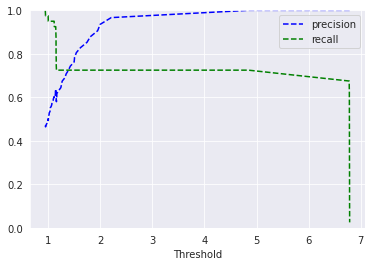

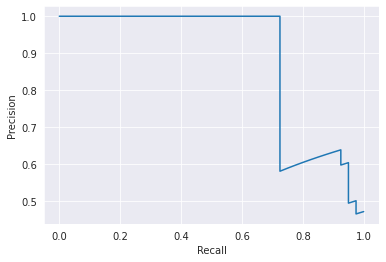

In [ ]:
    for nm in names:
        runs = runs
        rauc = np.zeros(runs)
        ap = np.zeros(runs)
        filename = nm.strip()
        global data_format
        data_format = int(data_format)
        if data_format == 0:
            x, labels = dataLoading(input_path + filename + ".csv")
        else:
            x, labels = get_data_from_svmlight_file(input_path + filename + ".svm")
            x = x.tocsr()
        outlier_indices = np.where(labels == 1)[0]
        outliers = x[outlier_indices]
        n_outliers_org = outliers.shape[0]

        train_time = 0
        test_time = 0
        for i in np.arange(runs):
            x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.4, random_state=42,stratify=labels)
            y_train = np.array(y_train)
            y_test = np.array(y_test)
            print(filename + ': round ' + str(i))
            outlier_indices = np.where(y_train == 1)[0]
            inlier_indices = np.where(y_train == 0)[0]
            n_outliers = len(outlier_indices)
            print("Original training size: %d, No. outliers: %d" % (x_train.shape[0], n_outliers))

            n_noise = len(np.where(y_train == 0)[0]) * cont_rate / (1. - cont_rate)
            n_noise = int(n_noise)

            rng = np.random.RandomState(random_seed)
            if data_format == 0:
                if n_outliers > known_outliers:
                    mn = n_outliers - known_outliers
                    remove_idx = rng.choice(outlier_indices, mn, replace=False)
                    #print('remove_idx', remove_idx)
                    x_train = np.delete(x_train, remove_idx, axis=0)
                    y_train = np.delete(y_train, remove_idx, axis=0)

                noises = inject_noise(outliers, n_noise, random_seed)
                x_train = np.append(x_train, noises, axis=0)
                y_train = np.append(y_train, np.zeros((noises.shape[0], 1)))

            else:
                if n_outliers > known_outliers:
                    mn = n_outliers - known_outliers
                    remove_idx = rng.choice(outlier_indices, mn, replace=False)
                    retain_idx = set(np.arange(x_train.shape[0])) - set(remove_idx)
                    retain_idx = list(retain_idx)
                    x_train = x_train[retain_idx]
                    y_train = y_train[retain_idx]

                noises = inject_noise_sparse(outliers, n_noise, random_seed)
                x_train = vstack([x_train, noises])
                y_train = np.append(y_train, np.zeros((noises.shape[0], 1)))

            outlier_indices = np.where(y_train == 1)[0]
            inlier_indices = np.where(y_train == 0)[0]
            print('training samples num:', y_train.shape[0],
                  'outlier num:', outlier_indices.shape[0],
                  'inlier num:', inlier_indices.shape[0],
                  'noise num:', n_noise)
            n_samples_trn = x_train.shape[0]
            n_outliers = len(outlier_indices)
            print("Training data size: %d, No. outliers: %d" % (x_train.shape[0], n_outliers))

            start_time = time.time()
            input_shape = x_train.shape[1:]
            print('input_shape', input_shape)
            epochs = epochs
            batch_size = batch_size
            nb_batch = nb_batch

            model = deviation_network(input_shape, network_depth)
            print(model.summary())
            model_filename= filename + "_" + str(cont_rate) + "cr_"  + str(batch_size) +"bs_" + str(known_outliers) + "ko_" + str(network_depth) +"d.h5" 
            model_name = os.path.join('gdrive/My Drive/DevNet-semi accounting/model/devnet_', model_filename)
            checkpointer = ModelCheckpoint(filepath=model_name, monitor='loss', verbose=0,
                                           save_best_only=True, save_weights_only=True)

            model.fit_generator(
                batch_generator_sup(x_train, outlier_indices, inlier_indices, batch_size, nb_batch, rng),
                steps_per_epoch=nb_batch,
                epochs=epochs,
                callbacks=[checkpointer])
            train_time += time.time() - start_time

            start_time = time.time()
            scores = load_model_weight_predict(model_name, input_shape, network_depth, x_test)
            test_time += time.time() - start_time
            rauc[i], ap[i] = aucPerformance(scores, y_test)
            preds = scores
            #print('preds',preds)
            class_one = preds > 2
            predic_class = np.where(class_one == True,1,0)
            #print('predic_class', predic_class)
            
            precision_new = precision_score(y_test, predic_class)
            print('new precision',precision_new)
            recall_new = recall_score(y_test, predic_class)
            print('new recall',recall_new)
            f1_new = 2 * ((precision_new * recall_new) / (precision_new + recall_new ))
            print('f1 new',f1_new)
            
            precision, recall, thresh = precision_recall_curve(y_test, scores)
            
            fig = plt.figure()
            plt.plot(thresh, precision[:-1], 'b--', label='precision')
            plt.plot(thresh, recall[:-1], 'g--', label = 'recall')
            plt.xlabel('Threshold')
            plt.legend(loc='upper right')
            plt.ylim([0,1])
            #pyplot.show()
            fig.savefig('my_figure.png')
            
            fig2 = plt.figure()
            #precision, recall, _ = precision_recall_curve(scores, y_test)
            # plot the model precision-recall curve
            plt.plot(recall, precision)
            # axis labels
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            # show the legend
            #plt.legend(loc="upper right")
            # show the plot
            fig2.savefig('my_figure2.png')
            
            #f1 = f1_score(y_test, scores)
            #print('f1', f1)
            #best_threshold = thresh[np.argmax(precision)]
            #print('best threshold',best_threshold)
            #thresholds = []
            f1 = 2 * ((precision * recall) / (precision + recall ))
            #thresholds.append(thresh[np.argmax(f1_score)])
            max_precision = precision[np.argmax(f1)]
            max_recall = recall[np.argmax(f1)]
            print('max precision', max_precision)
            print('max recall', max_recall)
            #print('threshold', thresholds)
            f_one = 2 * ((max_precision * max_recall) / (max_precision + max_recall ))
            print('f1', f_one)

        mean_auc = np.mean(rauc)
        std_auc = np.std(rauc)
        mean_aucpr = np.mean(ap)
        std_aucpr = np.std(ap)
        train_time = train_time / runs
        test_time = test_time / runs
        print("average AUC-ROC: %.4f, average AUC-PR: %.4f" % (mean_auc, mean_aucpr))
        print("average runtime: %.4f seconds" % (train_time + test_time))
        #writeResults(filename + '_' + str(network_depth), x.shape[0], x.shape[1], n_samples_trn, n_outliers_org,n_outliers,network_depth, mean_auc, mean_aucpr, std_auc, std_aucpr, train_time, test_time, path=args.output)

# Weakly-supervised

In [ ]:
import os
import numpy as np

np.random.seed(42)
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

#tf.set_random_seed(42)
tf.random.set_seed(42)
#sess = tf.Session()
sess = tf.compat.v1.initialize_all_variables()

from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D, GlobalMaxPool1D, Flatten, RepeatVector, MaxPooling1D, LeakyReLU, BatchNormalization, LSTM, Flatten

import argparse
import numpy as np
import sys
from scipy.sparse import vstack, csc_matrix
#from utils import dataLoading, aucPerformance_norm, writeResults, get_data_from_svmlight_file, cutoff_threshold_single
from sklearn.model_selection import train_test_split
#from skmultilearn.model_selection import iterative_train_test_split
from numpy import savetxt, save
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score
import warnings



import time

MAX_INT = np.iinfo(np.int32).max
data_format = 0

In [ ]:
def dev_network_d(input_shape):
    '''
    network architecture with three hidden layer
    '''
    #Original
    x_input = Input(shape=input_shape)
    intermediate = Dense(1000, activation='relu',
                kernel_regularizer=regularizers.l2(0.01), name = 'hl1')(x_input)
    intermediate = Dropout(0.9)(intermediate)
    intermediate = Dense(250, activation='relu',
                kernel_regularizer=regularizers.l2(0.01), name = 'hl2')(intermediate)
    intermediate = Dropout(0.6)(intermediate)
    intermediate = Dense(20, activation='relu',
                kernel_regularizer=regularizers.l2(0.01), name = 'hl3')(intermediate)
    intermediate = Dropout(0.3)(intermediate)
    intermediate = Dense(1, activation='linear', name = 'score')(intermediate)
    
    return Model(x_input, intermediate)

In [ ]:
def dev_network_s(input_shape):
    '''
    network architecture with one hidden layer
    '''
    x_input = Input(shape=input_shape)
    intermediate = Dense(20, activation='relu', 
                kernel_regularizer=regularizers.l2(0.01), name = 'hl1')(x_input)
    intermediate = Dropout(0.9)(intermediate)
    intermediate = Dense(1, activation='sigmoid',  name = 'score')(intermediate)
    #intermediate = Dropout(0.4)(intermediate)
    return Model(x_input, intermediate)

In [ ]:
def dev_network_linear(input_shape):
    '''
    network architecture with no hidden layer, equivalent to linear mapping from
    raw inputs to anomaly scores (def-linear)
    '''
    x_input = Input(shape=input_shape)
    intermediate = Dense(1, activation='linear', name='score')(x_input)
    return Model(x_input, intermediate)

In [ ]:
def deviation_loss(y_true, y_pred):
    '''
    z-score-based deviation loss
    '''
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    confidence_margin = 5.
    ## size=5000 is the setting of l in algorithm 1 in the paper
    ref = K.variable(np.random.normal(loc=0., scale=1.0, size=5000), dtype='float32')
    dev = (y_pred - K.mean(ref)) / K.std(ref)
    inlier_loss = K.abs(dev)
    outlier_loss = K.abs(K.maximum(confidence_margin - dev, 0.))
    return K.mean((1 - y_true) * inlier_loss + y_true  * outlier_loss)

In [ ]:
def deviation_network(input_shape, network_depth):
    '''
    construct the deviation network-based detection model
    '''
    if network_depth == 4:
        model = dev_network_d(input_shape)
    elif network_depth == 2:
        model = dev_network_s(input_shape)
    elif network_depth == 1:
        model = dev_network_linear(input_shape)
    else:
        sys.exit("The network depth is not set properly")
    rms = RMSprop(clipnorm=1.)
    #opt = SGD(lr=0.1, momentum=0.9)
    #model.compile(loss=deviation_loss, optimizer=rms)
    model.compile(loss='binary_crossentropy', optimizer=rms)
    #model.compile(loss='binary_crossentropy', optimizer='adam')
    #model.compile(loss='mean_squared_error', optimizer=rms)
    return model

In [ ]:
def batch_generator_sup(x, outlier_indices, inlier_indices, outlier_analysis_indices, outlier_backdoor_indices, outlier_dos_indices, batch_size, nb_batch, rng):
    """batch generator
    """
    rng = np.random.RandomState(rng.randint(MAX_INT, size=1))
    #print('rng',rng)
    counter = 0
    while 1:
        if data_format == 0:
            #ref, training_labels = input_batch_generation_sup(x, outlier_indices, inlier_indices, batch_size, rng)
            #ref, training_labels = input_batch_generation_fullysup(x, outlier_indices, inlier_indices, outlier_analysis_indices, outlier_backdoor_indices, outlier_dos_indices, outlier_exploits_indices, outlier_fuzzers_indices, outlier_generic_indices, outlier_reconnaissance_indices, outlier_shellcode_indices, outlier_worms_indices, batch_size, rng)
            #ref, training_labels = input_batch_generation_weaksup(x, outlier_indices, inlier_indices, outlier_analysis_indices, outlier_backdoor_indices, outlier_dos_indices, outlier_exploits_indices, outlier_fuzzers_indices, outlier_generic_indices, outlier_reconnaissance_indices, outlier_shellcode_indices, outlier_worms_indices, batch_size, rng)
            #ref, training_labels = input_batch_generation_fullysup_withoutworms(x, outlier_indices, inlier_indices, outlier_analysis_indices, outlier_backdoor_indices, outlier_dos_indices, outlier_exploits_indices, outlier_fuzzers_indices, outlier_generic_indices, outlier_reconnaissance_indices, outlier_shellcode_indices, outlier_worms_indices, batch_size, rng)
            #ref, training_labels = input_batch_generation_fullysup_withoutworms_shellcode(x, outlier_indices, inlier_indices, outlier_analysis_indices, outlier_backdoor_indices, outlier_dos_indices, outlier_exploits_indices, outlier_fuzzers_indices, outlier_generic_indices, outlier_reconnaissance_indices, outlier_shellcode_indices, outlier_worms_indices, batch_size, rng)
            #ref, training_labels = input_batch_generation_fullysup_withoutworms_shellcode_reconnaissance_backdoor_analysis(x, outlier_indices, inlier_indices, outlier_analysis_indices, outlier_backdoor_indices, outlier_dos_indices, outlier_exploits_indices, outlier_fuzzers_indices, outlier_generic_indices, outlier_reconnaissance_indices, outlier_shellcode_indices, outlier_worms_indices, batch_size, rng)
            ref, training_labels = input_batch_generation_weaklyonlyone(x, outlier_indices, inlier_indices, outlier_analysis_indices, outlier_backdoor_indices, outlier_dos_indices, batch_size, rng)
        else:
            ref, training_labels = input_batch_generation_sup_sparse(x, outlier_indices, inlier_indices, outlier_analysis_indices, outlier_backdoor_indices, outlier_dos_indices, outlier_exploits_indices, outlier_fuzzers_indices, outlier_generic_indices, outlier_reconnaissance_indices, outlier_shellcode_indices, outlier_worms_indices, batch_size, rng)
        counter += 1
        yield (ref, training_labels)
        if (counter > nb_batch):
            counter = 0

In [ ]:
def input_batch_generation_weaklyonlyone(x_train, outlier_indices, inlier_indices, outlier_analysis_indices, outlier_backdoor_indices, outlier_dos_indices, batch_size, rng):
    '''
    batchs of samples. This is for csv data.
    Alternates between positive and negative pairs.
    '''
    dim = x_train.shape[1]
    ref = np.empty((batch_size, dim))
    training_labels = []
    n_inliers = len(inlier_indices)
    n_outliers = len(outlier_indices)
    
    n_outliers_analysis = len(outlier_analysis_indices)
 
    n_outliers_backdoor = len(outlier_backdoor_indices)
  
    n_outliers_dos = len(outlier_dos_indices)  
    
    for i in range(batch_size):
        #print('i',i)
        if (i % 2 == 0):
            #print('normal')
            sid = rng.choice(n_inliers, 1)
            #print('sid', sid)
            ref[i] = x_train[inlier_indices[sid]]
            training_labels += [0]

         #if (i % 2 == 0):
        else:
            ##print('analysis')
            sid = rng.choice(n_outliers_analysis,1) 
            ref[i] = x_train[outlier_analysis_indices[sid]]
            training_labels += [1]
            
        #else:
            ##print('backdoor')
            #sid = rng.choice(n_outliers_backdoor,1) 
            #ref[i] = x_train[outlier_backdoor_indices[sid]]
            #training_labels += [1]  

    return np.array(ref), np.array(training_labels)

In [ ]:
def input_batch_generation_sup(x_train, outlier_indices, inlier_indices, batch_size, rng):
    '''
    batchs of samples. This is for csv data.
    Alternates between positive and negative pairs.
    '''
    dim = x_train.shape[1]
    ref = np.empty((batch_size, dim))
    training_labels = []
    n_inliers = len(inlier_indices)
    n_outliers = len(outlier_indices)
    for i in range(batch_size):
        if (i % 2 == 0):
            sid = rng.choice(n_inliers, 1)
            ref[i] = x_train[inlier_indices[sid]]
            training_labels += [0]
        else:
            sid = rng.choice(n_outliers, 1)
            ref[i] = x_train[outlier_indices[sid]]
            training_labels += [1]
    #print('ref', ref[0])
    #print('training_labels',training_labels[0], training_labels[1])
    #print('trainlabels', training_labels)
    return np.array(ref), np.array(training_labels)

In [ ]:
def input_batch_generation_sup_sparse(x, outlier_indices, inlier_indices, outlier_analysis_indices, outlier_backdoor_indices, outlier_dos_indices, outlier_exploits_indices, outlier_fuzzers_indices, outlier_generic_indices, outlier_reconnaissance_indices, outlier_shellcode_indices, outlier_worms_indices, batch_size, rng):
    '''
    batchs of samples. This is for libsvm stored sparse data.
    Alternates between positive and negative pairs.
    '''
    ref = np.empty((batch_size))
    training_labels = []
    n_inliers = len(inlier_indices)
    n_outliers = len(outlier_indices)
    for i in range(batch_size):
        if (i % 2 == 0):
            sid = rng.choice(n_inliers, 1)
            ref[i] = inlier_indices[sid]
            training_labels += [0]
        else:
            sid = rng.choice(n_outliers, 1)
            ref[i] = outlier_indices[sid]
            training_labels += [1]
    ref = x_train[ref, :].toarray()
    return ref, np.array(training_labels)

In [ ]:
def load_model_weight_predict(model_name, input_shape, network_depth, x_test):
    '''
    load the saved weights to make predictions
    '''
    model = deviation_network(input_shape, network_depth)
    model.load_weights(model_name)
    scoring_network = Model(inputs=model.input, outputs=model.output)

    if data_format == 0:
        scores = scoring_network.predict(x_test)
    else:
        data_size = x_test.shape[0]
        scores = np.zeros([data_size, 1])
        count = 512
        i = 0
        while i < data_size:
            subset = x_test[i:count].toarray()
            scores[i:count] = scoring_network.predict(subset)
            if i % 1024 == 0:
                print(i)
            i = count
            count += 512
            if count > data_size:
                count = data_size
        assert count == data_size
    return scores

In [ ]:
def inject_noise_sparse(seed, n_out, random_seed):
    '''
    add anomalies to training data to replicate anomaly contaminated data sets.
    we randomly swape 5% features of anomalies to avoid duplicate contaminated anomalies.
    This is for sparse data.
    '''
    rng = np.random.RandomState(random_seed)
    n_sample, dim = seed.shape
    swap_ratio = 0.05
    n_swap_feat = int(swap_ratio * dim)
    seed = seed.tocsc()
    noise = csc_matrix((n_out, dim))
    #print(noise.shape)
    for i in np.arange(n_out):
        outlier_idx = rng.choice(n_sample, 2, replace=False)
        o1 = seed[outlier_idx[0]]
        o2 = seed[outlier_idx[1]]
        swap_feats = rng.choice(dim, n_swap_feat, replace=False)
        noise[i] = o1.copy()
        noise[i, swap_feats] = o2[0, swap_feats]
    return noise.tocsr()


def inject_noise(seed, n_out, random_seed):
    '''
    add anomalies to training data to replicate anomaly contaminated data sets.
    we randomly swape 5% features of anomalies to avoid duplicate contaminated anomalies.
    this is for dense data
    '''
    rng = np.random.RandomState(random_seed)
    n_sample, dim = seed.shape
    swap_ratio = 0.05
    n_swap_feat = int(swap_ratio * dim)
    noise = np.empty((n_out, dim))
    for i in np.arange(n_out):
        outlier_idx = rng.choice(n_sample, 2, replace=False)
        o1 = seed[outlier_idx[0]]
        o2 = seed[outlier_idx[1]]
        swap_feats = rng.choice(dim, n_swap_feat, replace=False)
        noise[i] = o1.copy()
        noise[i, swap_feats] = o2[swap_feats]
    return noise

In [ ]:
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.externals.joblib import Memory
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from numpy import savetxt
import warnings
import numpy as np
import tensorflow as tf
import sklearn.metrics as sk_m

mem = Memory("gdrive/My Drive/DevNet-semi accounting/dataset/svm_data")


@mem.cache
def get_data_from_svmlight_file(path):
    data = load_svmlight_file(path)
    return data[0], data[1]


def dataLoading():
    # loading data
  
    
    labels = pd.read_csv('gdrive/My Drive/DevNet-semi accounting/dataset/labels_621.csv')
    
    x =  pd.read_csv('gdrive/My Drive/DevNet-semi accounting/dataset/ori_subset_transformed_621.csv')
    
    
    print("Data shape: (%d, %d)" % x.shape)

    return x, labels

def aucPerformance(mse, labels):
    roc_auc = roc_auc_score(labels, mse)
    ap = average_precision_score(labels, mse)
    #auc_roc_tf = tf.keras.metrics.AUC(num_thresholds=200, curve='ROC', summation_method='minoring', name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None)
    #auc_pr_tf = tf.keras.metrics.AUC(num_thresholds=200, curve='PR', summation_method='minoring', name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None)
    #auc_roc_tf.update_state(labels, mse)
    #auc_pr_tf.update_state(labels, mse)
    print("AUC-ROC: %.4f, AUC-PR: %.4f" % (roc_auc, ap))
    #return roc_auc, ap, auc_roc_tf, auc_pr_tf
    return roc_auc, ap

def aucPerformance_norm(mse, labels):
    roc_auc = roc_auc_score(labels, mse)
    ap = average_precision_score(labels, mse)
    #auc_roc_tf = tf.keras.metrics.AUC(num_thresholds=20000, curve='ROC', summation_method='minoring', name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None)
    #auc_pr_tf = tf.keras.metrics.AUC(num_thresholds=20000, curve='PR', summation_method='minoring', name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None)
    #auc_roc_tf.update_state(labels, mse)
    #auc_pr_tf.update_state(labels, mse)
    #precisiontf = tf.keras.metrics.Precision()
    #precisiontf.update_state(labels, mse)
    #precisiontf.result().numpy()
    print("AUC-ROC: %.4f, AUC-PR: %.4f" % (roc_auc, ap))
    #return roc_auc, ap, precisiontf 
    return roc_auc, ap

def prec(scores, y_test):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')  
    prec, rec, thr = precision_recall_curve(y_test, scores)
    figura = plt.figure()
    plt.plot(thr, prec[:-1], 'b--', label='precision')
    plt.plot(thr, rec[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper right')
    plt.ylim([0,1])
    #pyplot.show()
    figura.savefig('figura.png')
        
    figura2 = plt.figure()
    #precision, recall, _ = precision_recall_curve(scores, y_test)
    # plot the model precision-recall curve
    plt.plot(rec, prec)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    #plt.legend(loc="upper right")
    # show the plot
    figura2.savefig('figura2.png')
    
    f1 = 2 * ((prec * rec) / (prec + rec))
    #thresholds.append(thresh[np.argmax(f1_score)])
    max_prec = prec[np.argmax(f1)]
    max_rec = rec[np.argmax(f1)]
    print('max precision', max_prec)
    print('max recall', max_rec)
    #print('threshold', thresholds)
    f1 = 2 * ((max_prec * max_rec) / (max_prec + max_rec ))
    print('f1', f1)
    
    return max_prec, max_rec, f1

def writeResults(name, n_samples, dim, n_samples_trn, n_outliers_trn, n_outliers, depth, rauc, ap, std_auc, std_ap,
                 train_time, test_time, path="gdrive/My Drive/DevNet-semi accounting/results/auc_performance_cl0.5.csv"):
    csv_file = open(path, 'a')
    row = name + "," + str(n_samples) + "," + str(dim) + ',' + str(n_samples_trn) + ',' + str(
        n_outliers_trn) + ',' + str(n_outliers) + ',' + str(depth) + "," + str(rauc) + "," + str(std_auc) + "," + str(
        ap) + "," + str(std_ap) + "," + str(train_time) + "," + str(test_time) + "\n"
    csv_file.write(row)


# Weakly-supervised evaluation

In [ ]:
names = ['ori_subset_transformed_621']
cont_rate = 0
network_depth = 2
random_seed = 42
data_format = 0
batch_size = 64
nb_batch = 30
epochs = 50
runs = 1
known_outliers = 10
cont_rate = 0.0
input_path = 'gdrive/My Drive/DevNet-semi accounting/dataset'

Data shape: (533009, 621)
type x <class 'pandas.core.frame.DataFrame'>
shape x_narr (533009, 618)
ori_subset_transformed_621: round 0
analysis attack number  54
backdoor attack number  26
dos attack number  426327
analysis attack number test 16
backdoor attack number test 4
dos attack number test 106582
Original training size: 426407, No. outliers: 80
analysis anomalies 10
backdoor anomalies 0
analysis anomalies validation 4
backdoor anomalies validation 4
noises shape (0, 618)
training samples num: 426337 outlier num: 10 inlier num: 426327 noise num: 0
training samples num: 426337 outlier num: 10 inlier num: 426327
Training data size: 426337, No. outliers: 10
input_shape (618,)
x_train shape (426337, 618)
x_test shape (106590, 618)
y_train shape (426337,)
y_test shape (106590, 1)
Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 618)]           

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


30/30 [==============================] - 1s 20ms/step - loss: 1.4698
Epoch 2/50
30/30 [==============================] - 1s 19ms/step - loss: 0.5525
Epoch 3/50
30/30 [==============================] - 1s 19ms/step - loss: 0.4225
Epoch 4/50
30/30 [==============================] - 1s 18ms/step - loss: 0.3688
Epoch 5/50
30/30 [==============================] - 1s 20ms/step - loss: 0.3324
Epoch 6/50
30/30 [==============================] - 1s 19ms/step - loss: 0.3155
Epoch 7/50
30/30 [==============================] - 1s 20ms/step - loss: 0.2990
Epoch 8/50
30/30 [==============================] - 1s 18ms/step - loss: 0.2873
Epoch 9/50
30/30 [==============================] - 1s 18ms/step - loss: 0.2734
Epoch 10/50
30/30 [==============================] - 1s 18ms/step - loss: 0.2627
Epoch 11/50
30/30 [==============================] - 1s 18ms/step - loss: 0.2645
Epoch 12/50
30/30 [==============================] - 1s 18ms/step - loss: 0.2638
Epoch 13/50
30/30 [=============================

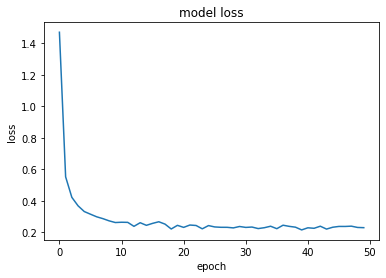

average AUC-ROC: 0.6047, average AUC-PR: 0.5000
STD AUC-ROC: 0.0000, STD AUC-PR: 0.0000
average runtime: 32.7659 seconds
max precision 1.0
max recall 0.5
f1 0.6666666666666666


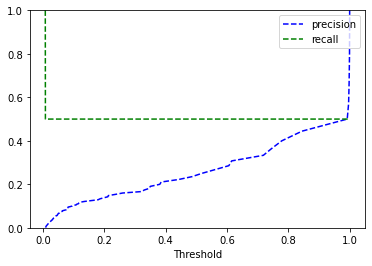

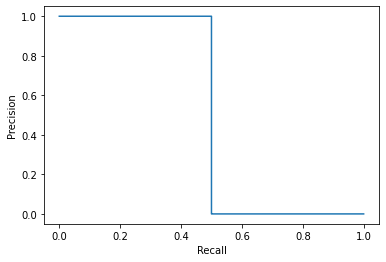

In [ ]:
    for nm in names:
        runs = runs
        rauc = np.zeros(runs)
        ap = np.zeros(runs)
        filename = nm.strip()
        global data_format
        data_format = data_format
        if data_format == 0:
            x, labels = dataLoading()
        else:
            x, labels = get_data_from_svmlight_file(input_path + filename + ".svm")
            x = x.tocsr()
        print("type x",type(x))
        x_narr = x.drop(['label_global', 'label_local', 'label_regular'], axis = 1)
        print("shape x_narr",x_narr.shape)
        x_narr = x_narr.values
        labels_narr = labels.values 
        outlier_indices = np.where(labels == 1)[0]
        outliers = x_narr[outlier_indices]
        n_outliers_org = outliers.shape[0]

        train_time = 0
        test_time = 0
        for i in np.arange(runs):
            x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.2, random_state=42, stratify=labels)
        
            attacks_train = x_train[['label_global', 'label_local', 'label_regular']]
            
            y_train = np.array(y_train)
            y_test = np.array(y_test)
              
            attack_analysis_train_pd = x_train['label_global']
            attack_backdoor_train_pd = x_train['label_local']
            attack_dos_train_pd = x_train['label_regular']
            
            attack_analysis_test_pd = x_test['label_global']
            attack_backdoor_test_pd = x_test['label_local']
            attack_dos_test_pd = x_test['label_regular']

            attack_analysis_train = np.array(attack_analysis_train_pd)
            attack_backdoor_train = np.array(attack_backdoor_train_pd)
            attack_dos_train = np.array(attack_dos_train_pd)
              
            attack_analysis_test = np.array(attack_analysis_test_pd)
            attack_backdoor_test = np.array(attack_backdoor_test_pd)
            attack_dos_test = np.array(attack_dos_test_pd)
            
            
            print(filename + ': round ' + str(i))
            outlier_indices = np.where(y_train == 1)[0]
            inlier_indices = np.where(y_train == 0)[0]
            
            outlier_analysis_indices = np.where(attack_analysis_train == 1)[0]
            outlier_backdoor_indices = np.where(attack_backdoor_train == 1)[0]
            outlier_dos_indices = np.where(attack_dos_train == 1)[0]
            
            
            outlier_analysis_indices_test = np.where(attack_analysis_test == 1)[0]
            outlier_backdoor_indices_test = np.where(attack_backdoor_test == 1)[0]
            outlier_dos_indices_test = np.where(attack_dos_test == 1)[0]
            
            
            n_outlier_analysis = len(outlier_analysis_indices) 
            print("analysis attack number ", n_outlier_analysis)
            
            n_outlier_backdoor = len(outlier_backdoor_indices) 
            print("backdoor attack number ", n_outlier_backdoor)
            
            n_outlier_dos = len(outlier_dos_indices) 
            print("dos attack number ", n_outlier_dos)
            
                        
            n_outlier_analysis_test = len(outlier_analysis_indices_test) 
            print("analysis attack number test", n_outlier_analysis_test)
            
            n_outlier_backdoor_test = len(outlier_backdoor_indices_test) 
            print("backdoor attack number test", n_outlier_backdoor_test)
            
            n_outlier_dos_test = len(outlier_dos_indices_test) 
            print("dos attack number test", n_outlier_dos_test)
            
            
          
            n_outliers = len(outlier_indices)
            print("Original training size: %d, No. outliers: %d" % (x_train.shape[0], n_outliers))
            
           
            x_train = x_train.drop(['label_global', 'label_local', 'label_regular'], axis = 1)
            x_test = x_test.drop(['label_global', 'label_local', 'label_regular'], axis = 1)
            
            x_train = x_train.values
            x_test = x_test.values
          
            n_noise = len(np.where(y_train == 0)[0]) * cont_rate / (1. - cont_rate)
            n_noise = int(n_noise)

            rng = np.random.RandomState(random_seed)
            
            if data_format == 0:
                if n_outliers > known_outliers:
                    
                    #mn_analysis = n_outlier_analysis
                    mn_analysis = n_outlier_analysis - known_outliers
                    remove_idx_analysis = rng.choice(outlier_analysis_indices,  mn_analysis, replace=False)
                    #print("remove_idx_analysis",remove_idx_analysis)
                    final_outlier_analysis = n_outlier_analysis - len(remove_idx_analysis)
                    print("analysis anomalies", final_outlier_analysis)
                    
                    mn_backdoor = n_outlier_backdoor 
                    #mn_backdoor = n_outlier_backdoor - known_outliers 
                    remove_idx_backdoor = rng.choice(outlier_backdoor_indices,  mn_backdoor, replace=False)
                    final_outlier_backdoor = n_outlier_backdoor - len(remove_idx_backdoor)
                    print("backdoor anomalies", final_outlier_backdoor)
    
                    #mn_dos = n_outlier_dos
                    #mn_dos = n_outlier_dos - known_outliers
                    #remove_idx_dos = rng.choice(outlier_dos_indices,  mn_dos, replace=False)
                    #final_outlier_dos = n_outlier_dos - len(remove_idx_dos)
                    #print("dos anomalies", final_outlier_dos)
                          
                    remove_idx = np.concatenate([remove_idx_analysis,remove_idx_backdoor])
                    
                    x_train = np.delete(x_train, remove_idx, axis=0)
                    y_train = np.delete(y_train, remove_idx, axis=0)
                    
                    attack_analysis_train = np.delete(attack_analysis_train, remove_idx, axis=0)
                    attack_backdoor_train = np.delete(attack_backdoor_train, remove_idx, axis=0)
                    attack_dos_train = np.delete(attack_dos_train, remove_idx, axis=0)
                    
                    #mn_analysis_test = n_outlier_analysis_test
                    mn_analysis_test = n_outlier_analysis_test - 4
                    remove_idx_analysis_test = rng.choice(outlier_analysis_indices_test,  mn_analysis_test, replace=False)
                    final_outlier_analysis_test = n_outlier_analysis_test - len(remove_idx_analysis_test)
                    print("analysis anomalies validation", final_outlier_analysis_test)
                    
                    #mn_backdoor_test = n_outlier_backdoor_test
                    mn_backdoor_test = n_outlier_backdoor_test - 4
                    remove_idx_backdoor_test = rng.choice(outlier_backdoor_indices_test,  mn_backdoor_test, replace=False)
                    final_outlier_backdoor_test = n_outlier_backdoor_test - len(remove_idx_backdoor_test)
                    print("backdoor anomalies validation", final_outlier_backdoor_test)
    
                    #mn_dos_test = n_outlier_dos_test
                    #mn_dos_test = n_outlier_dos_test - 213164
                    #remove_idx_dos_test = rng.choice(outlier_dos_indices_test,  mn_dos_test, replace=False)
                    #print("remove dos",len(remove_idx_dos))
                    #final_outlier_dos_test = n_outlier_dos_test - len(remove_idx_dos_test)
                    #print("dos anomalies validation", final_outlier_dos_test)
                         
                    remove_idx_test = np.concatenate([remove_idx_analysis_test,remove_idx_backdoor_test])
                    
                    x_test = np.delete(x_test, remove_idx_test, axis=0)
                    y_test = np.delete(y_test, remove_idx_test, axis=0)    
         
                noises = inject_noise(outliers, n_noise, random_seed)
                print("noises shape", noises.shape)
                x_train = np.append(x_train, noises, axis=0)
                y_train = np.append(y_train, np.zeros((noises.shape[0], 1)))

            else:
                if n_outliers > known_outliers:
                    mn = n_outliers - known_outliers
                    remove_idx = rng.choice(outlier_indices, mn, replace=False)
                    retain_idx = set(np.arange(x_train.shape[0])) - set(remove_idx)
                    retain_idx = list(retain_idx)
                    x_train = x_train[retain_idx]
                    y_train = y_train[retain_idx]

                noises = inject_noise_sparse(outliers, n_noise, random_seed)
                x_train = vstack([x_train, noises])
                y_train = np.append(y_train, np.zeros((noises.shape[0], 1)))

            outlier_indices = np.where(y_train == 1)[0]
            inlier_indices = np.where(y_train == 0)[0]
          
            outlier_analysis_indices = np.where(attack_analysis_train == 1)[0]
            
            outlier_backdoor_indices = np.where(attack_backdoor_train == 1)[0]
            
            outlier_dos_indices = np.where(attack_dos_train == 1)[0]
            
            print('training samples num:', y_train.shape[0],
                  'outlier num:', outlier_indices.shape[0],
                  'inlier num:', inlier_indices.shape[0],
                  'noise num:', n_noise)
            print('training samples num:', y_train.shape[0],
                  'outlier num:', outlier_indices.shape[0],
                  'inlier num:', inlier_indices.shape[0])
            n_samples_trn = x_train.shape[0]
            n_outliers = len(outlier_indices)
            print("Training data size: %d, No. outliers: %d" % (x_train.shape[0], n_outliers))

            start_time = time.time()
            input_shape = x_train.shape[1:]
            print('input_shape', input_shape)
           
            print('x_train shape', x_train.shape)
            print('x_test shape', x_test.shape)
            print('y_train shape', y_train.shape)
            print('y_test shape', y_test.shape)
            
            epochs = epochs
            batch_size = batch_size
            nb_batch = nb_batch

            model = deviation_network(input_shape, network_depth)
            print(model.summary())
            model_filename= filename + "_" + str(cont_rate) + "cr_"  + str(batch_size) +"bs_" + str(known_outliers) + "ko_" + str(network_depth) +"d.h5" 
            model_name = os.path.join('gdrive/My Drive/DevNet-semi accounting/model/devnet_', model_filename)
            checkpointer = ModelCheckpoint(filepath=model_name, monitor='loss', verbose=0,
                                           save_best_only=True, save_weights_only=True)

            model.fit_generator(
                batch_generator_sup(x_train, outlier_indices, inlier_indices, outlier_analysis_indices, outlier_backdoor_indices, outlier_dos_indices, batch_size, nb_batch, rng),
                steps_per_epoch=nb_batch,
                epochs=epochs,
                callbacks=[checkpointer])
            train_time += time.time() - start_time

            start_time = time.time()
            scores = load_model_weight_predict(model_name, input_shape, network_depth, x_test)
            test_time += time.time() - start_time
            rauc[i], ap[i] = aucPerformance_norm(scores, y_test)
            
            preds = scores
            
            class_one = preds > 0.5
            predic_class = np.where(class_one == True,1,0)
            
            precision_new = precision_score(y_test, predic_class)
            print('new precision',precision_new)
            recall_new = recall_score(y_test, predic_class)
            print('new recall',recall_new)
            f1_new = 2 * ((precision_new * recall_new) / (precision_new + recall_new ))
            print('f1 new',f1_new)
            precision, recall, thresh = precision_recall_curve(y_test, scores)

            fig3 = plt.figure()
            plt.plot(model.history.history['loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            #plt.legend(['train', 'validation'], loc='upper left')
            plt.show()
            fig3.savefig('my_figure3.png')
            

        mean_auc = np.mean(rauc)
        std_auc = np.std(rauc)
        mean_aucpr = np.mean(ap)
        std_aucpr = np.std(ap)
        train_time = train_time / runs
        test_time = test_time / runs
       
        print("average AUC-ROC: %.4f, average AUC-PR: %.4f" % (mean_auc, mean_aucpr))
        print("STD AUC-ROC: %.4f, STD AUC-PR: %.4f" % (std_auc,  std_aucpr))
        print("average runtime: %.4f seconds" % (train_time + test_time))
        
        fig = plt.figure()
        plt.plot(thresh, precision[:-1], 'b--', label='precision')
        plt.plot(thresh, recall[:-1], 'g--', label = 'recall')
        plt.xlabel('Threshold')
        plt.legend(loc='upper right')
        plt.ylim([0,1])
        #pyplot.show()
        fig.savefig('my_figure.png')
        
        fig2 = plt.figure()
       
        plt.plot(recall, precision)
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        #plt.legend(loc="upper right")
        # show the plot
        fig2.savefig('my_figure2.png')
        
        f1 = 2 * ((precision * recall) / (precision + recall ))
        max_precision = precision[np.argmax(f1)]
        max_recall = recall[np.argmax(f1)]
        print('max precision', max_precision)
        print('max recall', max_recall)
        f_one = 2 * ((max_precision * max_recall) / (max_precision + max_recall ))
        print('f1', f_one)
        
        #writeResults(filename + '_' + str(network_depth), x.shape[0], x.shape[1], n_samples_trn, n_outliers_org,
                     #n_outliers,
                     #network_depth, mean_auc, mean_aucpr, std_auc, std_aucpr, train_time, test_time, path=args.output)


#Model Interpretability

In [ ]:
import pandas as pd

labels = pd.read_csv('gdrive/My Drive/DevNet-semi accounting/dataset/labelbin.csv')
labels

,target
0,0
1,0
2,0
3,0
4,0
...,...
533004,0
533005,0
533006,0
533007,0


In [ ]:
import pandas as pd
ori_subset_transformed = pd.read_csv('gdrive/My Drive/DevNet-semi accounting/dataset/ori_subset_transformed.csv')
ori_subset_transformed

In [ ]:
#load the synthetic ERP dataset
ori_dataset = pd.read_csv('/content/gdrive/My Drive/dataset journal entries/fraud_dataset_v2.csv')
ori_dataset

In [ ]:
ori_dataset

In [ ]:
labelinitial = ori_dataset['label']

In [ ]:
labelinitial

In [ ]:
feature_names = ['DMBTR','WRBTR']

In [ ]:
rob = list(ori_subset_transformed.columns.values.tolist())

In [ ]:
rob.pop()

In [ ]:
categorical_features = rob

In [ ]:
categorical_features

['KTOSL_A19',
 'KTOSL_B06',
 'KTOSL_B12',
 'KTOSL_B83',
 'KTOSL_C1',
 'KTOSL_C2',
 'KTOSL_C3',
 'KTOSL_C39',
 'KTOSL_C4',
 'KTOSL_C5',
 'KTOSL_C6',
 'KTOSL_C7',
 'KTOSL_C76',
 'KTOSL_C8',
 'KTOSL_C84',
 'KTOSL_C9',
 'KTOSL_D30',
 'KTOSL_D51',
 'KTOSL_D84',
 'KTOSL_D89',
 'KTOSL_E35',
 'KTOSL_E40',
 'KTOSL_F19',
 'KTOSL_F45',
 'KTOSL_G09',
 'KTOSL_G19',
 'KTOSL_G28',
 'KTOSL_I08',
 'KTOSL_I94',
 'KTOSL_J33',
 'KTOSL_J53',
 'KTOSL_J67',
 'KTOSL_J81',
 'KTOSL_K00',
 'KTOSL_K78',
 'KTOSL_K80',
 'KTOSL_K84',
 'KTOSL_L07',
 'KTOSL_L09',
 'KTOSL_L17',
 'KTOSL_L29',
 'KTOSL_L59',
 'KTOSL_M10',
 'KTOSL_N30',
 'KTOSL_N39',
 'KTOSL_N40',
 'KTOSL_N80',
 'KTOSL_O50',
 'KTOSL_P12',
 'KTOSL_P13',
 'KTOSL_P17',
 'KTOSL_P32',
 'KTOSL_P46',
 'KTOSL_P83',
 'KTOSL_Q28',
 'KTOSL_Q44',
 'KTOSL_R08',
 'KTOSL_R19',
 'KTOSL_R30',
 'KTOSL_R89',
 'KTOSL_S23',
 'KTOSL_S57',
 'KTOSL_S79',
 'KTOSL_T41',
 'KTOSL_U11',
 'KTOSL_U27',
 'KTOSL_U50',
 'KTOSL_V74',
 'KTOSL_V86',
 'KTOSL_V91',
 'KTOSL_V96',
 'KTOSL_W22',
 

In [ ]:
categorical_names = {}
for feature in range(len(categorical_features)):
    categorical_names[feature] = ['0','1']

In [ ]:
categorical_names

{0: ['0', '1'],
 1: ['0', '1'],
 2: ['0', '1'],
 3: ['0', '1'],
 4: ['0', '1'],
 5: ['0', '1'],
 6: ['0', '1'],
 7: ['0', '1'],
 8: ['0', '1'],
 9: ['0', '1'],
 10: ['0', '1'],
 11: ['0', '1'],
 12: ['0', '1'],
 13: ['0', '1'],
 14: ['0', '1'],
 15: ['0', '1'],
 16: ['0', '1'],
 17: ['0', '1'],
 18: ['0', '1'],
 19: ['0', '1'],
 20: ['0', '1'],
 21: ['0', '1'],
 22: ['0', '1'],
 23: ['0', '1'],
 24: ['0', '1'],
 25: ['0', '1'],
 26: ['0', '1'],
 27: ['0', '1'],
 28: ['0', '1'],
 29: ['0', '1'],
 30: ['0', '1'],
 31: ['0', '1'],
 32: ['0', '1'],
 33: ['0', '1'],
 34: ['0', '1'],
 35: ['0', '1'],
 36: ['0', '1'],
 37: ['0', '1'],
 38: ['0', '1'],
 39: ['0', '1'],
 40: ['0', '1'],
 41: ['0', '1'],
 42: ['0', '1'],
 43: ['0', '1'],
 44: ['0', '1'],
 45: ['0', '1'],
 46: ['0', '1'],
 47: ['0', '1'],
 48: ['0', '1'],
 49: ['0', '1'],
 50: ['0', '1'],
 51: ['0', '1'],
 52: ['0', '1'],
 53: ['0', '1'],
 54: ['0', '1'],
 55: ['0', '1'],
 56: ['0', '1'],
 57: ['0', '1'],
 58: ['0', '1'],
 59: ['

In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 2.9MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=ce3da2f8164b807e339cc962e6ba15dfe8f21ce840614ed3f7458599d9174bb6
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
feature_names

['DMBTR', 'WRBTR']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ori_subset_transformed, labels, test_size=0.2, random_state=42,stratify=labels)

In [ ]:
type(x_test)

pandas.core.frame.DataFrame

In [ ]:
x_test.shape

(266487, 618)

In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(x_test, mode = 'classification', feature_names = rob3,class_names=['0','1'],categorical_features=categorical_features, categorical_names=categorical_names,kernel_width=3)

In [ ]:
def predrob(x_test):
  predic_class = model.predict(x_test)       
  #class_ds = predic_class > 0.5
  #predic_class = np.where(class_ds == True,1,0)
  return predic_class.reshape(predic_class.shape[0])
  

In [ ]:
predrob(ori_subset_transformed.values,1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


array([0])

In [ ]:
type(ori_subset_transformed.values[1])

numpy.ndarray

In [ ]:
# asking for explanation for LIME model
i = 1
exp = explainer.explain_instance(x_test, predrob, num_features=618)

In [ ]:
x_train.shape

(319751, 618)

In [ ]:
def prob(data):
    return np.array(list(zip(1-model.predict(data),model.predict(data))))


In [ ]:
rob = model.predict(x_test)

Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.


In [ ]:
rob.reshape(213204)

array([0.00507206, 0.00348923, 0.00707883, ..., 0.00846002, 0.07595356,
       0.0031136 ], dtype=float32)

In [ ]:
model.feature_name = ori_subset_transformed.columns
model.feature_name

Index(['KTOSL_A19', 'KTOSL_B06', 'KTOSL_B12', 'KTOSL_B83', 'KTOSL_C1',
       'KTOSL_C2', 'KTOSL_C3', 'KTOSL_C39', 'KTOSL_C4', 'KTOSL_C5',
       ...
       'WAERS_V89', 'WAERS_W25', 'WAERS_W59', 'WAERS_X26', 'WAERS_Y59',
       'WAERS_Z06', 'WAERS_Z37', 'WAERS_Z54', 'DMBTR', 'WRBTR'],
      dtype='object', length=618)

In [ ]:
feat = ori_subset_transformed.columns

In [ ]:
feat

Index(['KTOSL_A19', 'KTOSL_B06', 'KTOSL_B12', 'KTOSL_B83', 'KTOSL_C1',
       'KTOSL_C2', 'KTOSL_C3', 'KTOSL_C39', 'KTOSL_C4', 'KTOSL_C5',
       ...
       'WAERS_V89', 'WAERS_W25', 'WAERS_W59', 'WAERS_X26', 'WAERS_Y59',
       'WAERS_Z06', 'WAERS_Z37', 'WAERS_Z54', 'DMBTR', 'WRBTR'],
      dtype='object', length=618)

In [ ]:
model.predict(x_test).astype(float)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


array([[0.00467254],
       [0.00314551],
       [0.00571373],
       ...,
       [0.00618601],
       [0.04971673],
       [0.002727  ]])

In [ ]:
import lime
import lime.lime_tabular


explainer = lime.lime_tabular.LimeTabularExplainer(x_train, feature_names=feat, class_names=['0','1'])    

In [ ]:
# asking for explanation for LIME model
i = 1
exp = explainer.explain_instance(x_test[:,1], prob, num_features=618)

In [ ]:
type(prob(x_test))

NameError: ignored

In [ ]:
!pip install shap

In [ ]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 1, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
#e = shap.DeepExplainer((Model.layers[0].input, odel.layers[-1].output), background)
shap_values = e.shap_values(x_test[1])

# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])

ValueError: ignored